# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


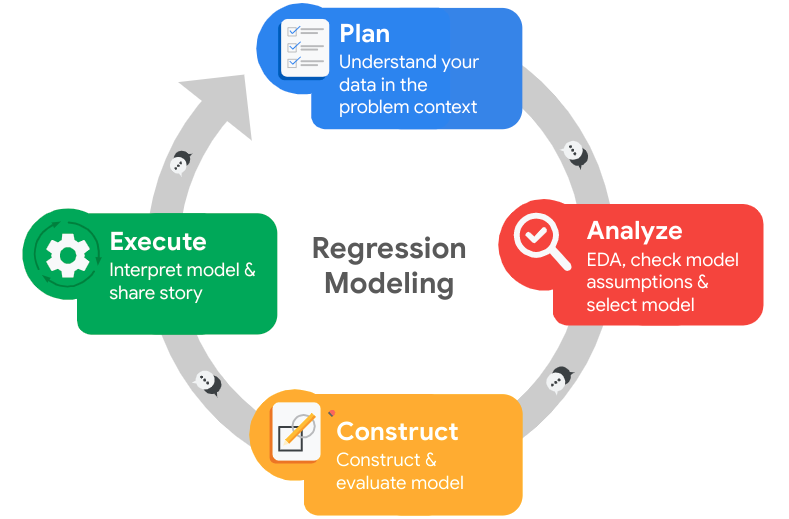

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? 
> Leadership team, Human Resources team, and data analysis team of Salifort Motors.  

- What are you trying to solve or accomplish?  
> Leadership team asks me to come up with ideas for how to increase employee retention.  
  
- What are your initial observations when you explore the data?  
> The data has 14,999 rows and 10 columns.  
  
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)  
> Kaggle link to this dataset: https://www.kaggle.com/datasets/tohidkhanbagani/salifort-dataset  
  
- Do you have any ethical considerations in this stage?  
> As I am expected to focus on the turnover and retention, in this stage I would pay more attention to the employees who left the company.  
  




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

import numpy as np
import pandas as pd
from numpy.linalg import cond

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

In [2]:
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


In [4]:
# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df0['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [8]:
df0['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns = {'average_montly_hours':'average_monthly_hours',
                     'time_spend_company':'tenure',
                     'Work_accident':'work_accident',
                     'Department':'department'}, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [11]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [12]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [13]:
3008 / 14999

0.2005467031135409

More than 20% of duplicates. This is suspicious as it is very hard to justify this large proportion with "manual entry errors". But in this project, we do not have data engineerer to consult. Therefore, we simply remove them from the data

In [14]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
# Check for duplicates in new DataFrame
df.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

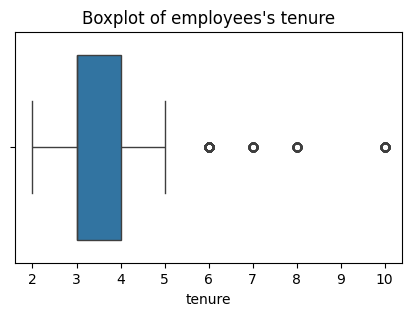

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize = (5,3))
sns.boxplot(data = df, x = 'tenure')
plt.title("Boxplot of employees's tenure")
plt.xlabel('tenure')
plt.show();

Some outliers exist in the `tenure` column.

In [18]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
def outliers_rows(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    lo_limit = q1 - 1.5 * iqr
    print(f"Upper limit: {up_limit}")
    print(f"Lower Limit: {lo_limit}")
    print(f"Number of outliers in tenure: {len(df[(df[col]<lo_limit)|(df[col]> up_limit)])}")

outliers_rows('tenure')

Upper limit: 5.5
Lower Limit: 1.5


Number of outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



In [19]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
df.groupby(by='department')['average_monthly_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
IT,976.0,200.638320,49.452109,96.0,160.0,197.0,244.00,308.0
RandD,694.0,201.291066,48.155340,98.0,161.0,199.5,247.00,308.0
accounting,621.0,200.877617,49.474541,97.0,156.0,199.0,246.00,310.0
hr,601.0,199.371048,48.466969,98.0,155.0,198.0,241.00,310.0
management,436.0,201.529817,46.797205,97.0,162.0,203.5,242.00,307.0
marketing,673.0,199.487370,47.989770,96.0,157.0,199.0,241.00,310.0
product_mng,686.0,198.893586,49.179060,98.0,155.0,197.0,241.75,310.0
sales,3239.0,200.242050,48.474620,96.0,157.0,201.0,242.00,310.0
support,1821.0,200.627128,48.919579,96.0,157.0,200.0,245.00,310.0


> Average working hours follow similar patterns across departments. 

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables? 

> `average_monthly_hours` is about 200, higher than that in the US, and the UK. This might have some correlation with `number_project`. Also, these two variables may be correlated with the `satisfaction_level`.

- What do you observe about the distributions in the data? 

> The data looks normally distributed. 
   
- What transformations did you make with your data? Why did you chose to make those decisions? 

> I may need to transform the categorical variables into integers later on in different stages.
   
- What are some purposes of EDA before constructing a predictive model? 

> It allows me to visualize the distribution of the data, as well as to get familiar with the data and the possible relationship. 

   
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.) 

> https://www.bls.gov/charts/american-time-use/emp-by-ftpt-job-edu-h.htm 
> https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/timeseries/ybuy/lms   

- Do you have any ethical considerations in this stage? 

> We will re-assess this question later on in this project. 
   




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [21]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts()


left
0    10000
1     1991
Name: count, dtype: int64

In [22]:
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts(normalize = True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

> Around 83% retention rate.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [23]:
col_list = list(df.columns)
num_col = []
cat_col = []
bin_col = ['work_accident', 'promotion_last_5years', 'left']
for col in col_list:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        num_col.append(col)
    else:
        cat_col.append(col)
num_col = [col for col in num_col if col not in bin_col]


In [24]:
# Make a copy of lists for future use
num_col_copy= num_col.copy()
cat_col_copy= cat_col.copy()
bin_col_copy= bin_col.copy()

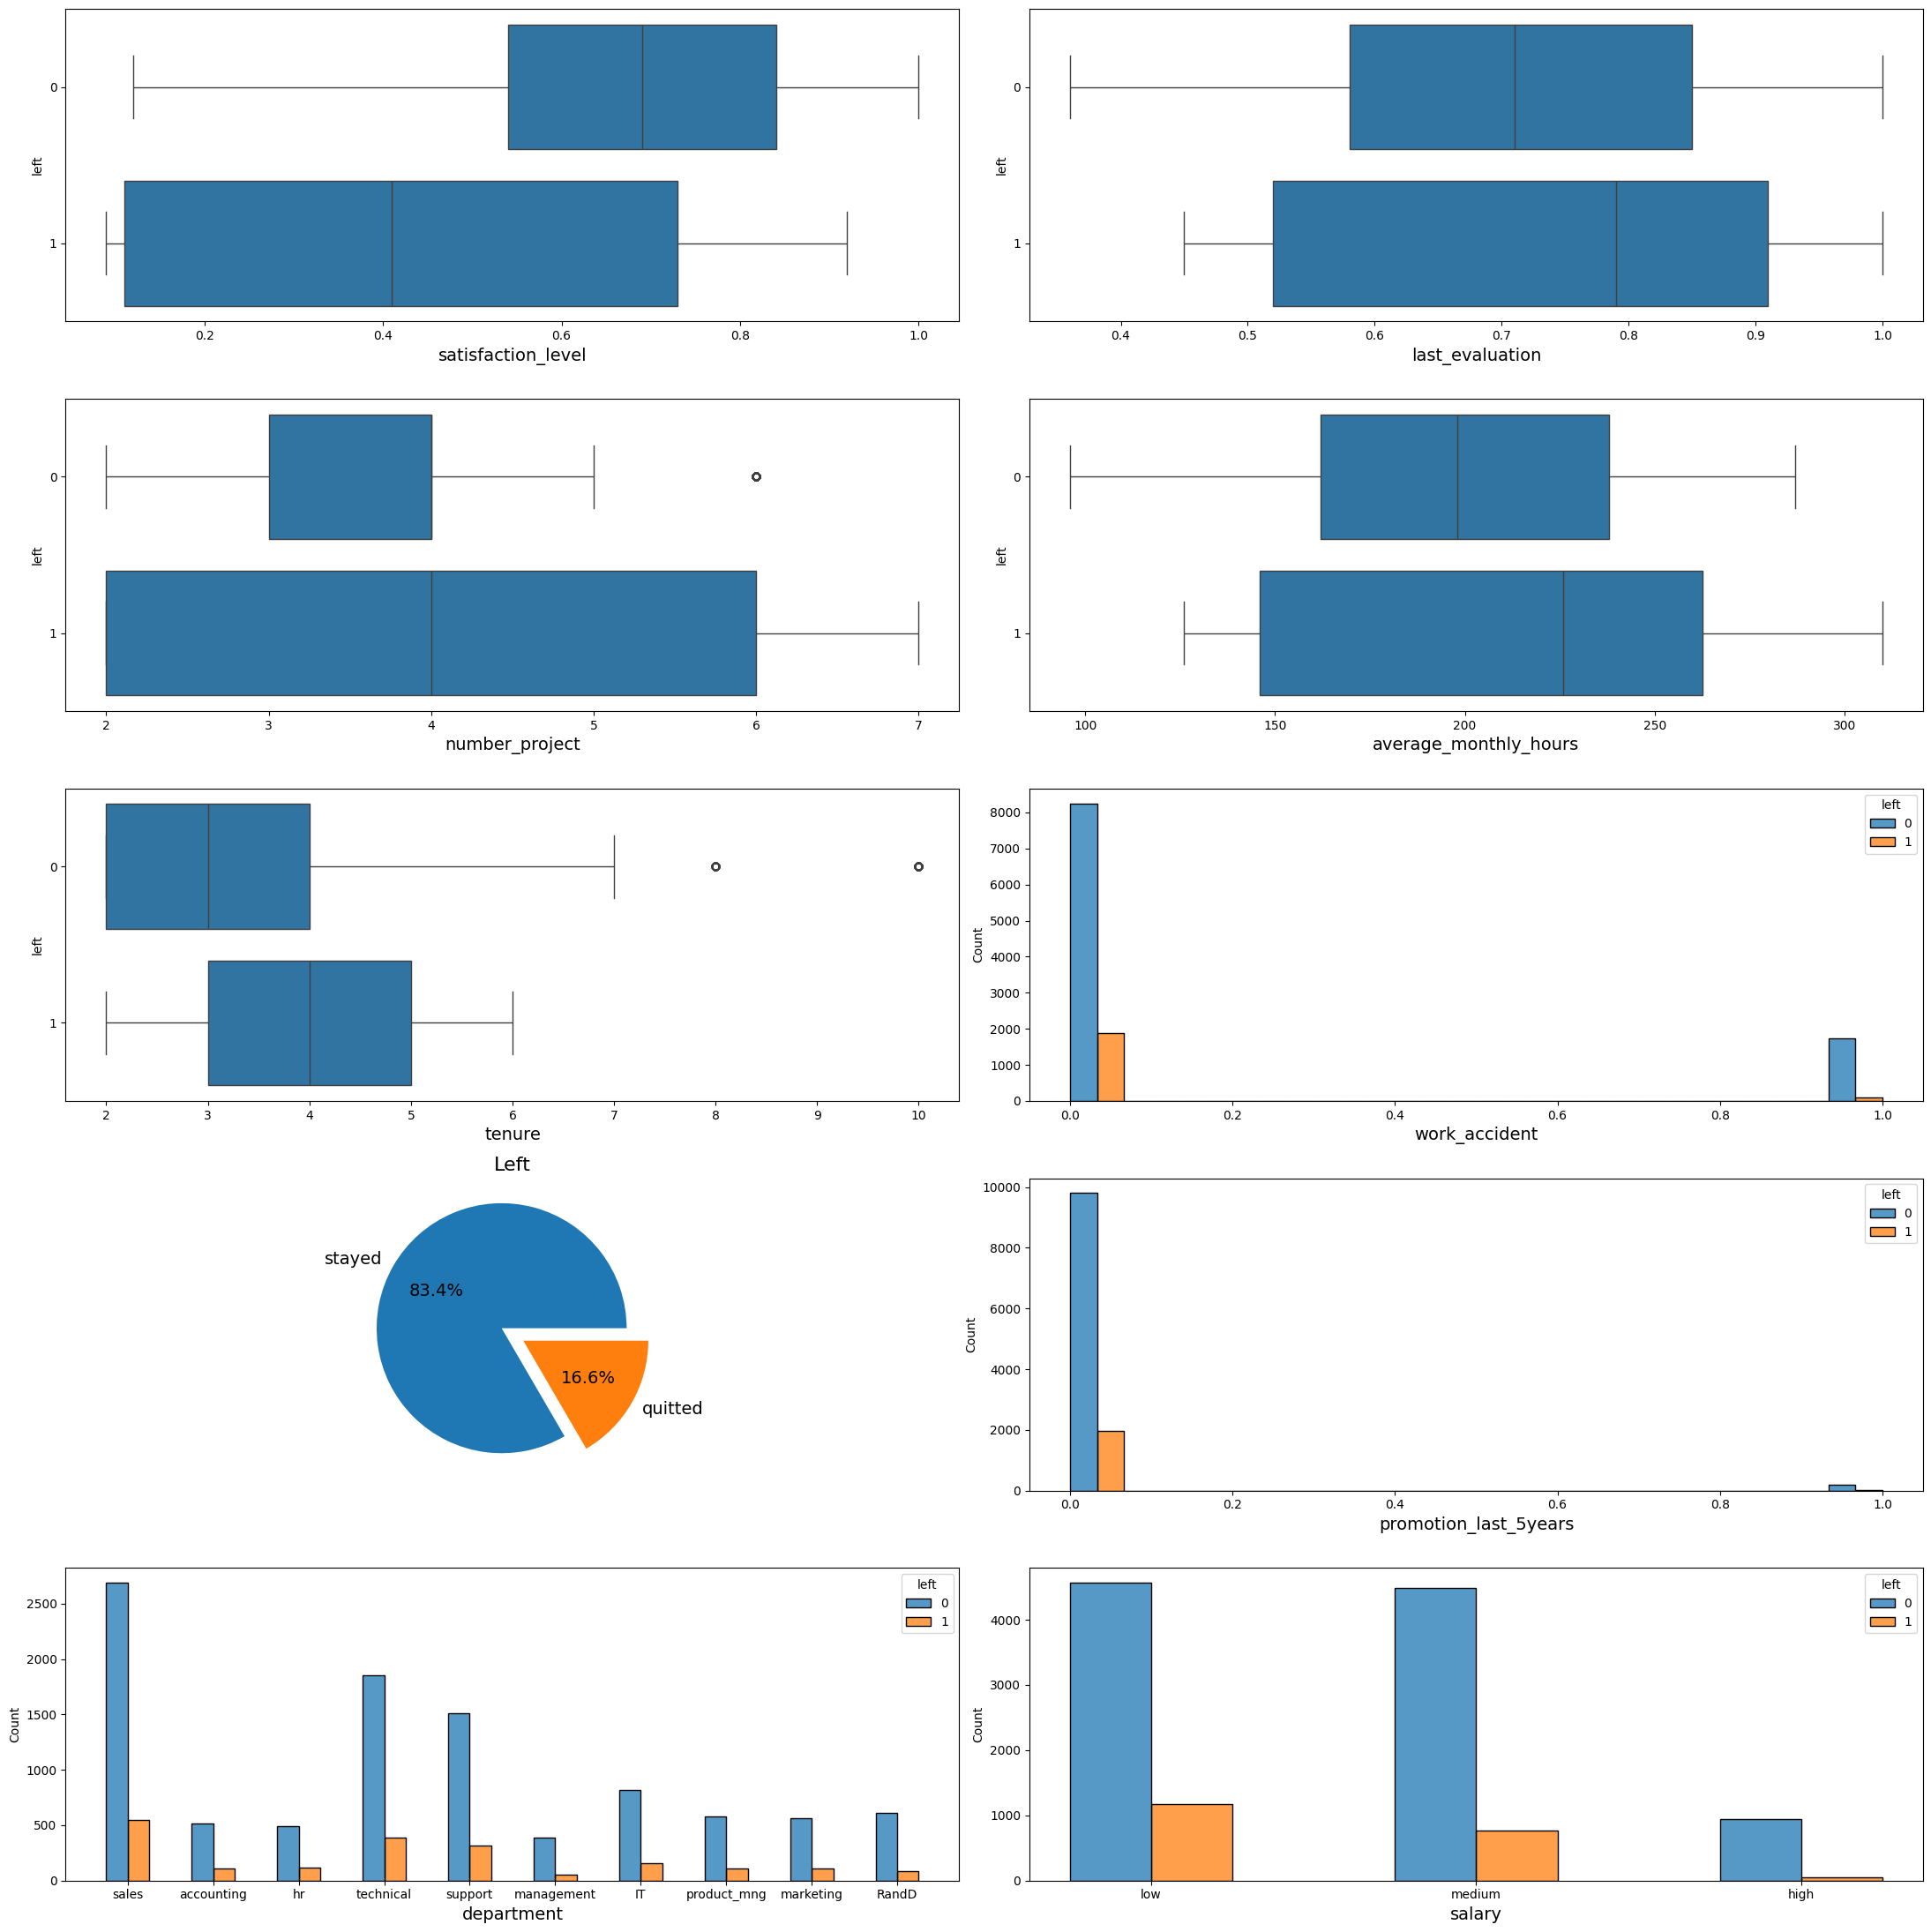

In [25]:
fig, axes = plt.subplots(5,2, figsize=(22,22))
axes = axes.flatten()

for i, col in enumerate(col_list):
    if col in num_col:
        sns.boxplot(data=df, x=col, y='left', orient='h', ax=axes[i])
        axes[i].set_xlabel(col, fontsize=14)
    elif col in cat_col:
        sns.histplot(data=df, x=col, hue='left', multiple='dodge', shrink=0.5, ax=axes[i])
        axes[i].set_xlabel(col, fontsize=14)
    elif col == 'left':
        plt.sca(axes[i])  
        plt.pie(df[col].value_counts().values, 
                labels=['stayed', 'quitted'], 
                explode=(0.1, 0.1), 
                autopct='%1.1f%%', 
                textprops={'fontsize': 14})  
        axes[i].set_title('Left', fontsize=16)  
    else:
        sns.histplot(data=df, x=col, hue='left', multiple='dodge', shrink=1, ax=axes[i])
        axes[i].set_xlabel(col, fontsize=14)  
plt.tight_layout()        
plt.show()

> Most of the independent variables distribute normally, except for `tenure` and `salary`, which is unsurprising. 

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
heatmap = sns.heatmap(df.corr(), mask = mask, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
heatmap.set_title('Correlation Heatmap')
plt.show();

ValueError: could not convert string to float: 'sales'

<Figure size 1600x900 with 0 Axes>

### **Relationships between `left` and other variables:**

In [ ]:
for col in num_col:
    print(f"Correlation of 'left' and {col}: {round(df['left'].corr(df[col]),4)}")

Correlation of 'left' and satisfaction_level: -0.3506
Correlation of 'left' and last_evaluation: 0.0135
Correlation of 'left' and number_project: 0.0309
Correlation of 'left' and average_monthly_hours: 0.0704
Correlation of 'left' and tenure: 0.1733


> **Pair-wise relationships between variables

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.58 µs


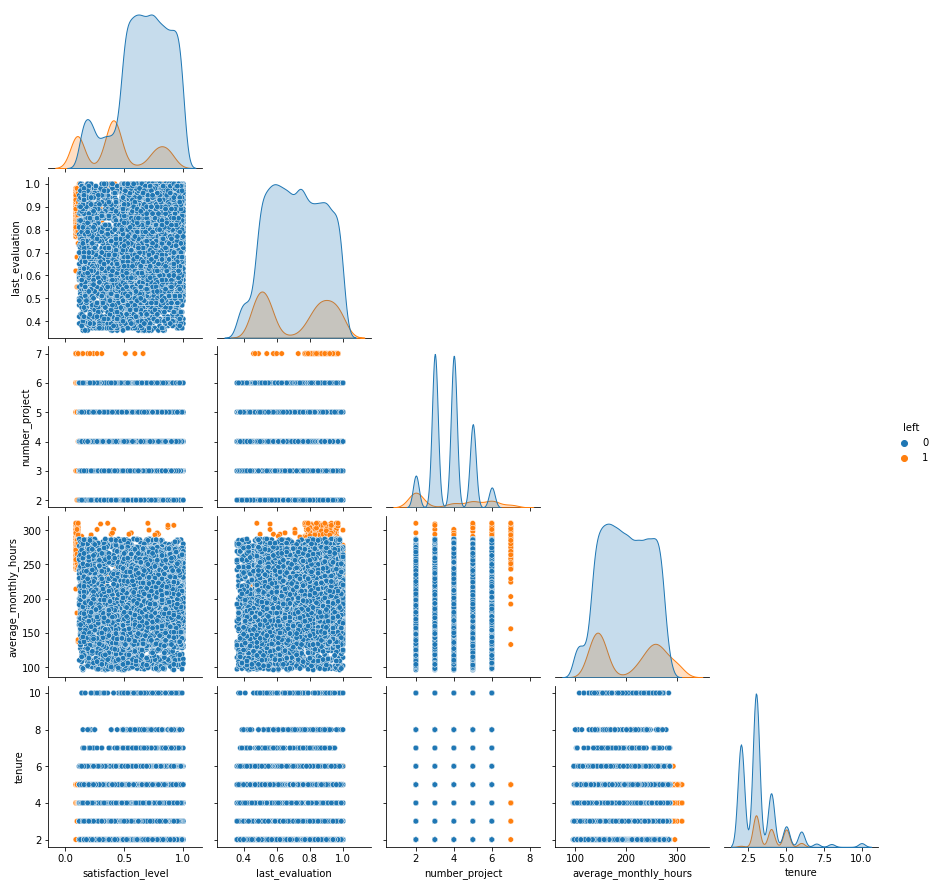

In [ ]:
%time
num_df = df[num_col]
num_df = pd.concat([num_df, df['left']], axis = 1)

mask = np.triu(np.ones_like(num_df.corr(), dtype=bool))

sns.pairplot(num_df, hue='left', kind='scatter', plot_kws={'s': 30}, corner=True)
plt.show()

plt.show()

**Deeper Exploration**

### **`average_monthly_hours`**  
  
> Here we explore more closely how average monthly working hours relate to other variables:

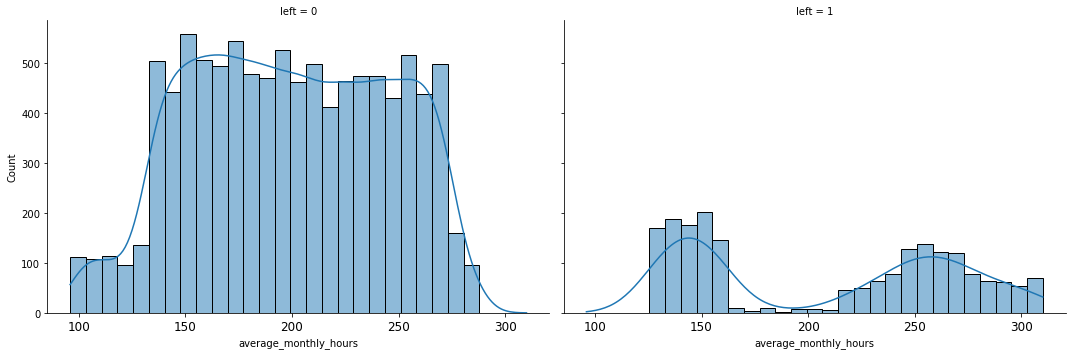

In [ ]:
g = sns.displot(df, x="average_monthly_hours", col="left", kde=True, height=5, aspect=1.5)

# Rotate x-axis labels for each subplot
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(),  fontsize=12)

plt.show()

> `average_monthly_hours` exhibited different distributions in 'stayed' and 'left'. The 'stayed' distribution looked normal, whereas the 'left' group showed an obvious bi-modal distribution.  
 
> Did it relate to `left`? We will test it in the next step. 

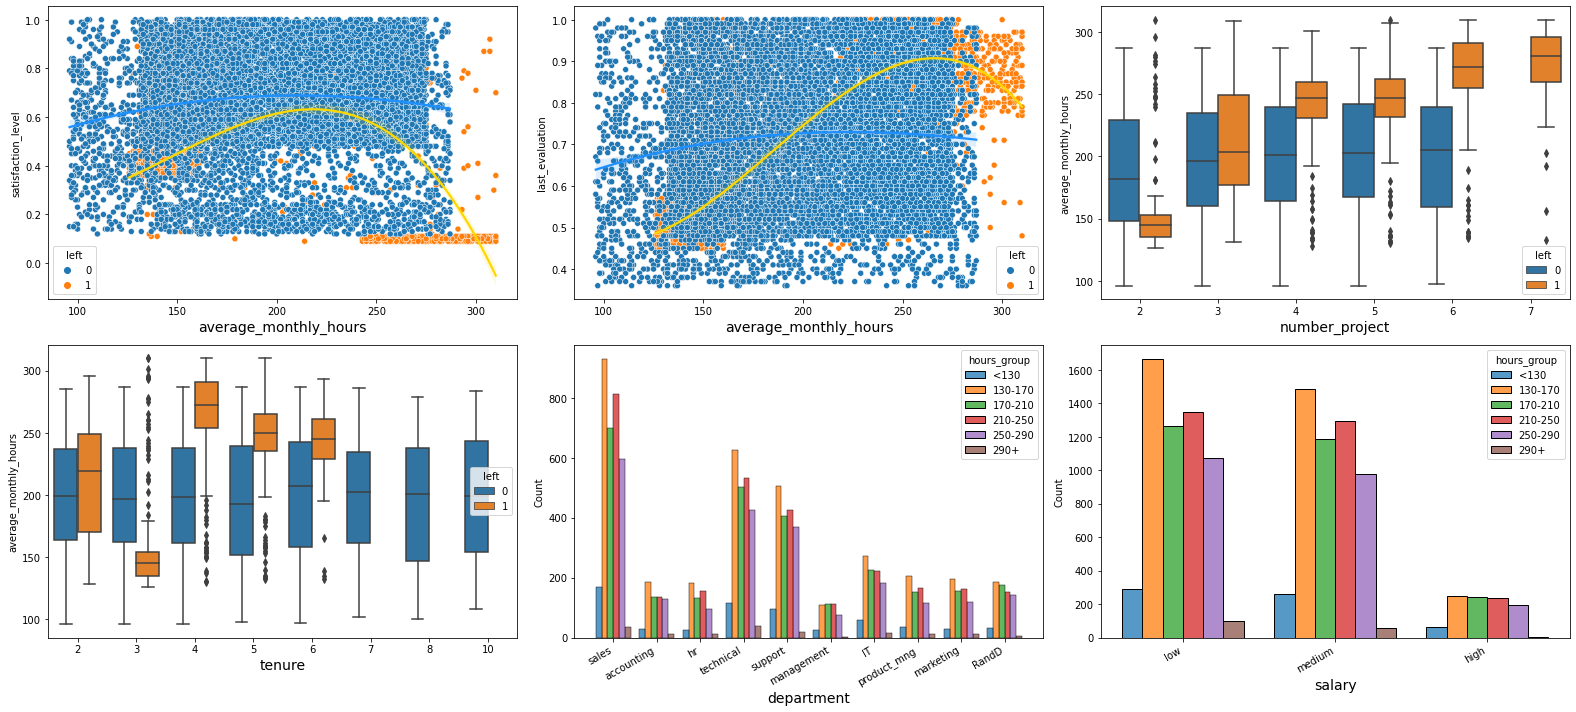

In [ ]:
col_list_temp = [col for col in col_list if col not in ['average_monthly_hours'] + bin_col]

bins = [90, 130, 170, 210, 250, 290, 330] 
labels = ['<130', '130-170', '170-210', '210-250', '250-290', '290+']
df['hours_group'] = pd.cut(df['average_monthly_hours'], bins=bins, labels=labels)

fig, axes = plt.subplots(2,3, figsize = (22,10))
axes=axes.flatten()


                           
for i, col in enumerate(col_list_temp):
    if col == 'number_project' or col == 'tenure':
        sns.boxplot(data = df, y = 'average_monthly_hours', x = col, hue = 'left', ax = axes[i])  
        axes[i].set_xlabel(col, fontsize = 14)        
    elif col in num_col:
        sns.scatterplot(data = df, y = col, x = 'average_monthly_hours', hue = 'left', ax = axes[i])
        sns.regplot(data=df[df['left']==0], y=col, x='average_monthly_hours', scatter=False, order = 3, color='dodgerblue', ax = axes[i])
        sns.regplot(data=df[df['left']==1], y=col, x='average_monthly_hours', scatter=False, order = 3, color='gold', ax = axes[i])
        axes[i].set_xlabel('average_monthly_hours', fontsize = 14)        
    elif col in cat_col:
        sns.histplot(data = df, x = col, hue = 'hours_group', multiple = 'dodge', shrink = 0.8, ax = axes[i])
        axes[i].set_xticklabels(df[col].unique(), ha = 'right', rotation = 30)
        axes[i].set_xlabel(col, fontsize = 14)

plt.tight_layout()
plt.show();

> Most employees who worked for between 150 and 250 hours per month tended to more satisfied. High working hours exployees had nearly zero `satisfaction level` and all of those left the company. But there were a group of employees who worked over 240 hours and high `satisfaction level` leaving the company. There might me some reason for this, maybe there was a competitor founded and attracted them? And of course, as supported by the above graphs, there existed a bunch of employees who had around 150 working hours quitted. We can see that their `satisfaction level` were just at around 0.4. We can see the `satisfaction_level` peaked at about 230 monthly working hours. 
  
> Those who worked for more around 300 hours were credited with high `last_evaluation`, but not the top. Some worked less had higher `last_evaluation` than them. Therefore it might be another job-quitting reason.  
  
> The medians of the `average_monthly_hours` grew with the `number_project`. And when the latter reached 7, all employees quitted. And we can see that across all workload in terms of `number_project`, `average_monthly_hours` recorded 300 as maximum. These employees left the company. Meanwhile, the maximum `average_monthly_hours` of the employees who stayed were 287 hours. This seemed a working hours threshold for the employees who were deciding to leave or not. 
  
> Employees who have worked for more than 7 years tended to stay. They also had `average_monthly_hours` less than 287. It is interesting to see that most employees who worked for 3 years and left had low `average_monthly_hours`, while the working time median leaped by more than 100 hours per month for those who left with the `tenure` of 4 years. Again, some sort of internal policy shift or market environment change might have happened.  
  
> Working hours across `department`s did not look diversed from each other.
  
> All three groups of `salary` level had similar `average_monthly_hours`. Similarly, more working hours per month exhibited higher turnover rate across `salary` levels.   

### **`satisfaction_level`**  
  
> From the correlation matrix above, we can see that the `satisfaction_level` played a critical role with `left` variable. Was is so important for the other variables?  

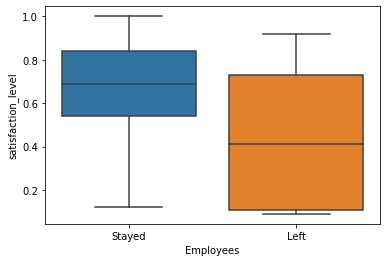

In [ ]:
sns.boxplot(data = df, x = 'left', y = 'satisfaction_level')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.xlabel('Employees')
plt.show()

> This was expected for the company that the employees who left the company had lower satisfaction. We should focus on the average `satisfaction level` for the two groups. The ones who left the company had a median of around 0.4, while those who stayed had 0.7. We can perform tests to verify the hypothesis if they had different means.

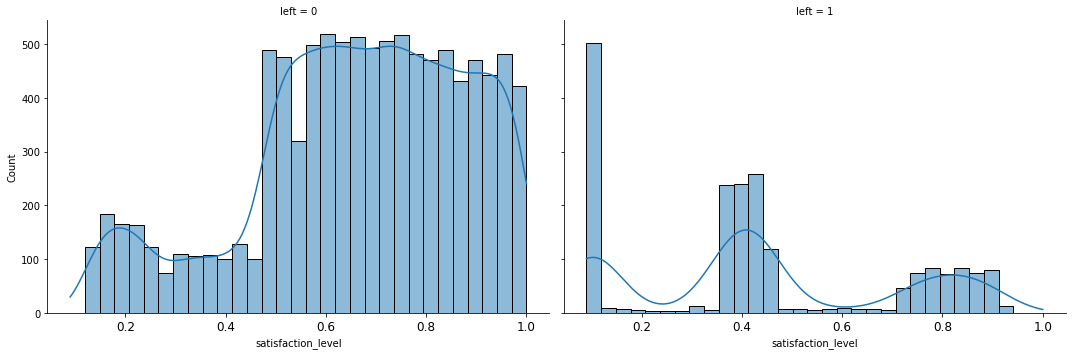

In [ ]:
g = sns.displot(df, x="satisfaction_level", col="left", kde=True, height=5, aspect=1.5)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

plt.show()

> 'satisfaction_level` skewed to the left for 'stayed' group. But for the 'left' group, there were 3 modes, ie., close-to-zero, 0.4 and over 0.7. 

In [ ]:
col_list_temp = [col for col in col_list if col not in ['average_monthly_hours', 'satisfaction_level','left']]

In [ ]:
int_col = list(col for col in col_list if df[col].dtype == 'int' and col not in ['left','average_monthly_hours'])

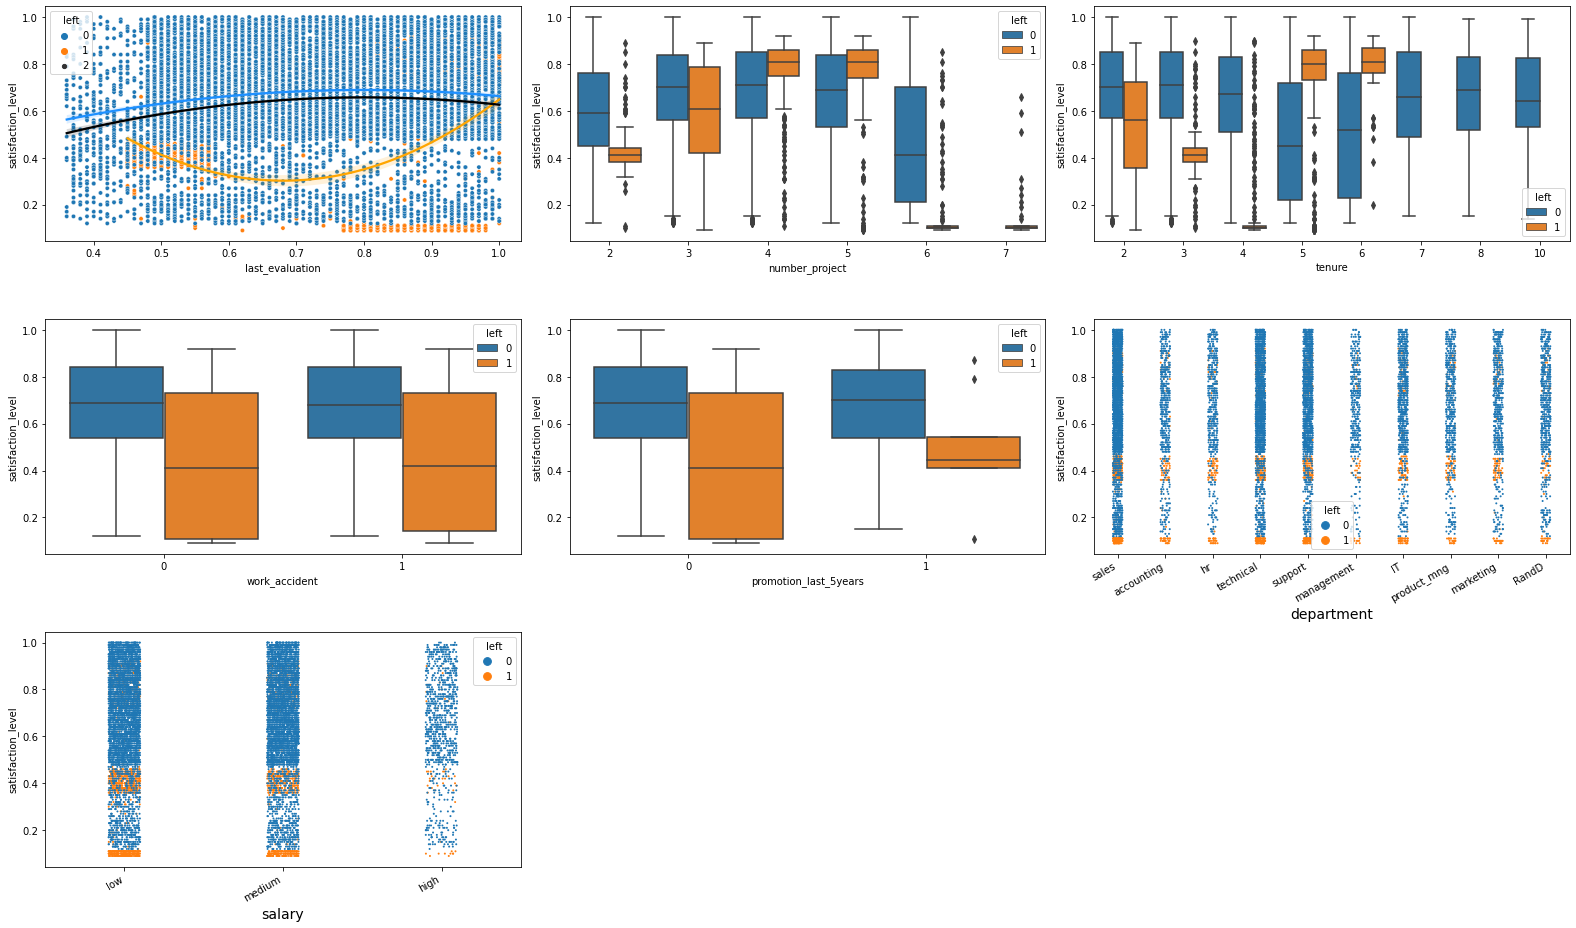

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (22,13))
axes = axes.flatten()
for i, col in enumerate(col_list_temp):
    if col in int_col:
        sns.boxplot(data=df, x=col, y='satisfaction_level', hue = 'left', ax = axes[i])
    elif col in cat_col:
        sns.stripplot(data=df, x=col, y='satisfaction_level', jitter=True, size = 2, hue = 'left', ax = axes[i])
        axes[i].set_xticklabels(df[col].unique(), ha = 'right', rotation = 30)
        axes[i].set_xlabel(col, fontsize = 14)
    elif col == 'last_evaluation':
        sns.scatterplot(data=df, x=col, y='satisfaction_level', size = 2, hue = 'left', ax = axes[i])
        sns.regplot(data=df[df['left']==0], x=col, y='satisfaction_level', scatter=False, order = 2, color='dodgerblue', ax = axes[i])
        sns.regplot(data=df[df['left']==1], x=col, y='satisfaction_level', scatter=False, order = 2, color='orange', ax = axes[i])        
        sns.regplot(data=df, x=col, y='satisfaction_level', scatter=False, order = 2, color='black', ax = axes[i])         
for i in range(len(axes)-len(col_list_temp)):
    axes[len(col_list_temp)+i].set_visible(False)

plt.tight_layout()
plt.show()

> In most cases, the higher the `last_evaluation`, the higher the `satisfaction_level`, the higher the retention rate. Some highly praised employees left the company with very low satisfaction. These employees seemed not too impressed with their appraisal.   
  
> The medians of the `satisfaction_level` reached the peak where `number_projects` were between 4 and 5, and dropped dreadfully beyond the level, for both stayed and left employees. These two variables obviously experienced a non-linear relationship. 
  
> The majority of the `satisfaction_level` medians across all `tenure` lengths stayed at around 0.4 to 0.6 for the staying employees. But the median dropped very low for the left employees who spent 4 years in the company. This looked another clue for something happened 4 years ago.  
  
> `work_accident` and `promotion_last_5years` did not contribute obvious extents of negative impact on `satisfaction_level`.
  
> `department` did not seem to have strong relation with `satisfaction_level` as the distribution of the score all looked similar; they all had a very upset and another slightly dissatisfied group of employees who eventually left the company.
  
>  The similar presented in the `salary` variable, while the number of high `salary` employees were much smaller. `salary` did not obviously relate to `satisfaction_level` . 
  

  
 

### **`number_project`**  
  
> Above we assessed that `number_project` related to `average_monthly_hours` closely. How was it like to other variables?  

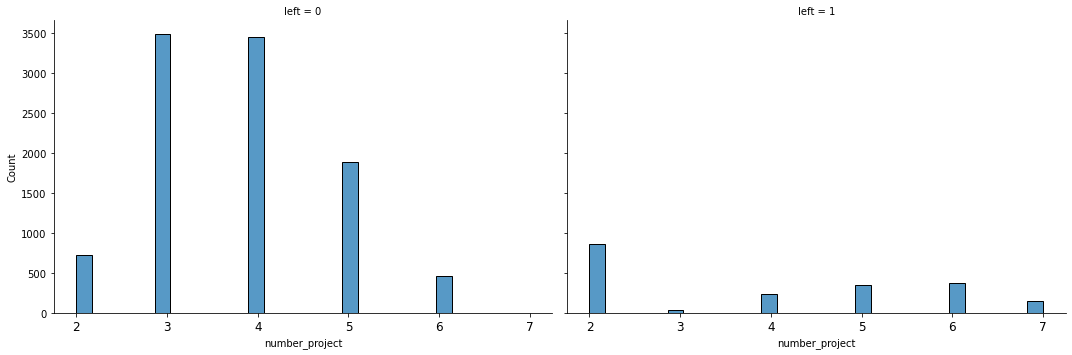

In [ ]:
g = sns.displot(df, x="number_project", col="left", kde=False, height=5, aspect=1.5)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

plt.show()

> 'Stayed' group was normally distributed, with the maximum `number_project` of 6. Meanwhile, `number_project` being assigned to employees, 2 was the number which was associated with 'left' status the most. 
  
> The maximum `number_project` of the two groups differed. How about the means? Were they distinctive? Let's test it.  

In [ ]:
col_list_temp.remove('number_project')

In [ ]:
int_col.remove('number_project')

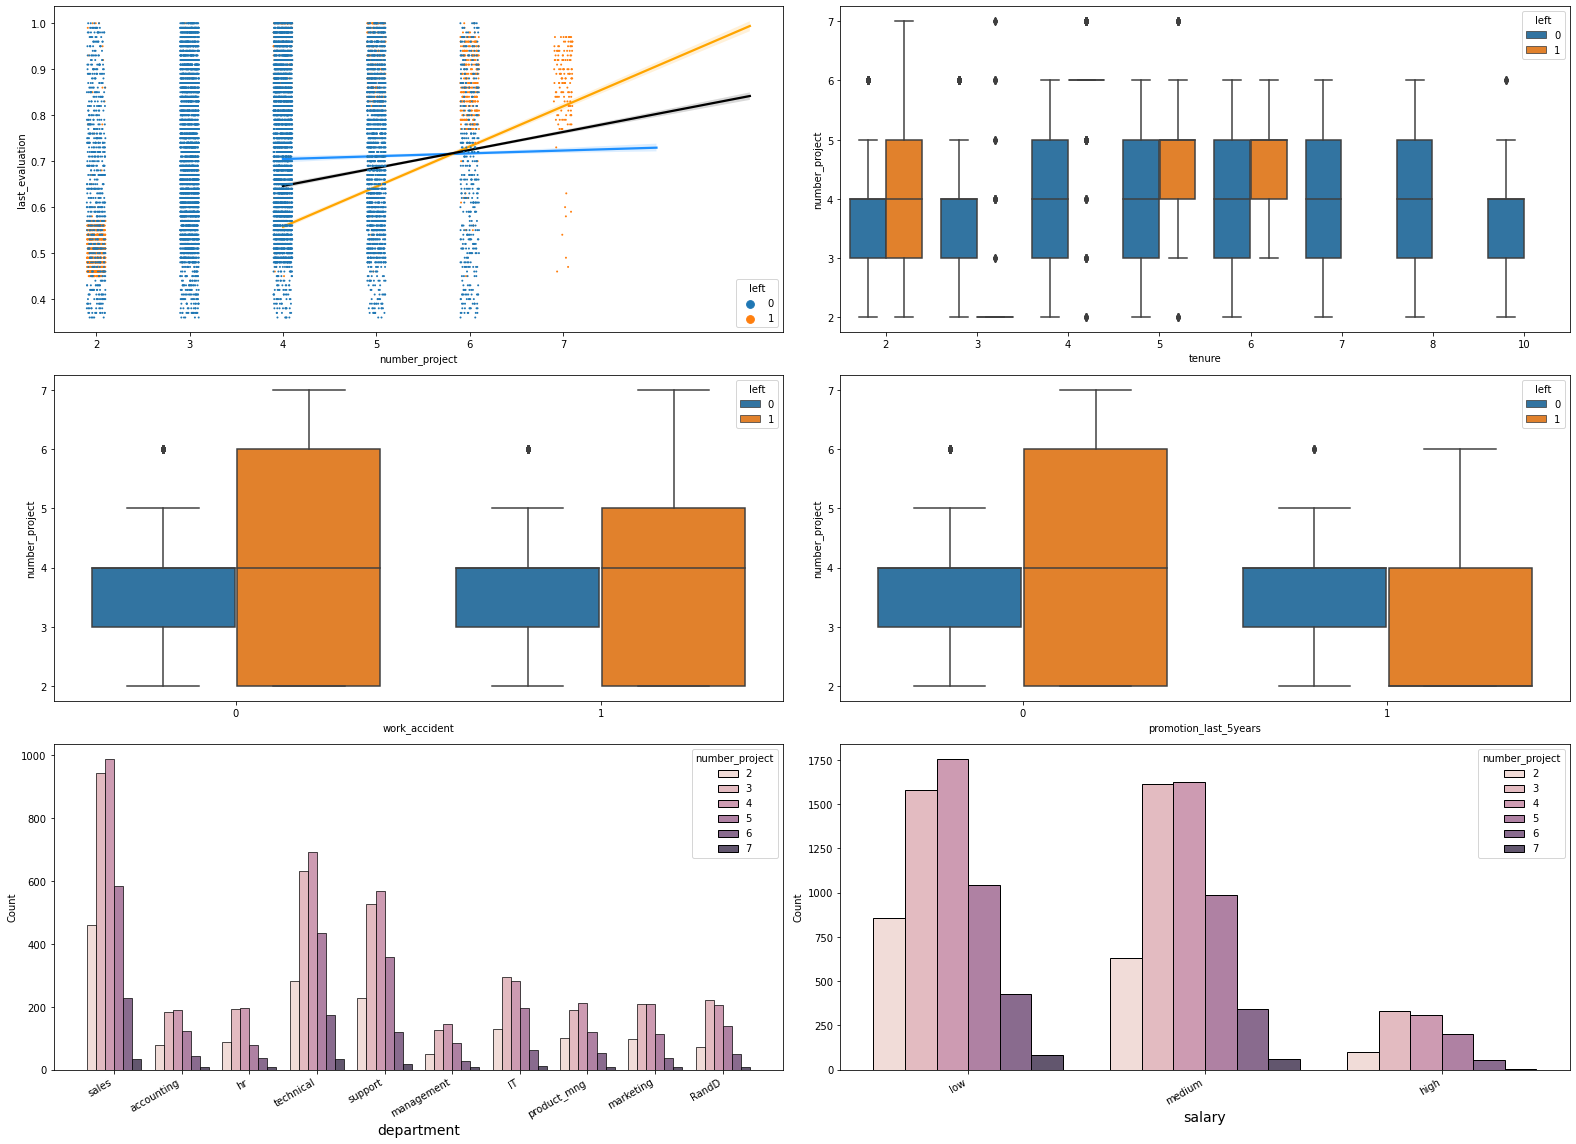

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (22,16))
axes = axes.flatten()
for i, col in enumerate(col_list_temp):
    if col in int_col:
        sns.boxplot(data=df, y='number_project', x=col, hue = 'left', ax = axes[i])
    elif col in cat_col:
        sns.histplot(data=df, x=col, hue = 'number_project', ax = axes[i], multiple = 'dodge', shrink = 0.8)
        axes[i].set_xticklabels(df[col].unique(), ha = 'right', rotation = 30)
        axes[i].set_xlabel(col, fontsize = 14)
    elif col == 'last_evaluation':
        sns.stripplot(data=df, y=col, x='number_project', size = 2, hue = 'left', ax = axes[i])
        sns.regplot(data=df[df['left']==0], y=col, x='number_project', scatter=False, color='dodgerblue', ax = axes[i])
        sns.regplot(data=df[df['left']==1], y=col, x='number_project', scatter=False, color='orange', ax = axes[i])         
        sns.regplot(data=df, y=col, x='number_project', scatter=False, color='black', ax = axes[i])
        
for i in range(len(axes)-len(col_list_temp)):
    axes[len(col_list_temp)+i].set_visible(False)

plt.tight_layout()
plt.show()

> It made sense to observe that the more the project an employee were assigned on average (black line), the higher the evaluation score they had. However, it was true only for the employees who left the company whereas `last_evaluation` was indifferent across `number_project` for the stayed. So we can see that extreme workload could not be compensated by being highly appraised.  
  
> While employees who worked for more than 6 years were assigned 6 projects at most, the ones who had less tenure could be assigned 1 more. This exhibits right_skewed distribution. 
  
> `number_project` looked the same between the groups of `work_accident`. It was also true for `promotion_last_5years` except that occasions existed when 7 projects were assigned to not-promoted employees. This might lead to their exit.  
  
> `department`s did not affect the `number_project` as the latter had distribution skewed to the right across all. This also happened in salary.    

### **`tenure`**  
  
> `tenure` revealed a suspicion that some event might have happened 4 years ago. Did it matter to other variables? Let's find out below.

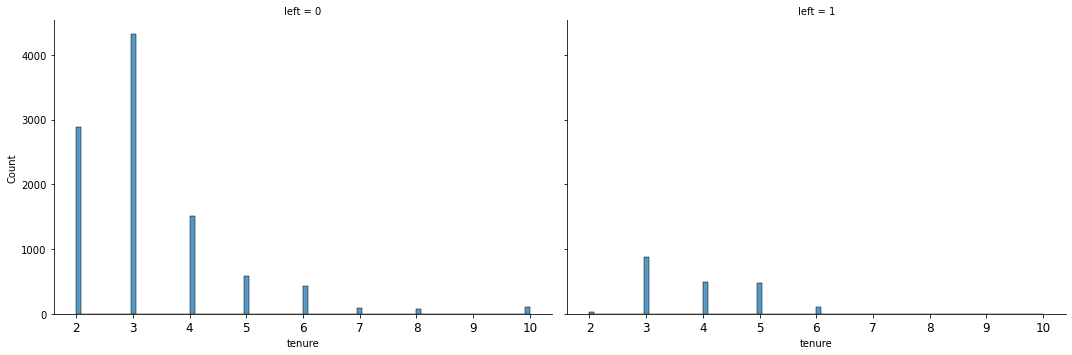

In [ ]:
g = sns.displot(df, x="tenure", col="left", kde=False, height=5, aspect=1.5)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

plt.show()

> In 'stayed' group, the `tenure` were skewed to the right, with the sharp peak at `tenure` equal to 3. The devastating drop occurred right after it. This drop from 4 years of `tenure` also occurred in 'left group, but milder in contrast. 
  
> Were they really different? Let's investigate by hypothesis testing.   

In [ ]:
col_list_temp.remove('tenure')

In [ ]:
int_col.remove('tenure')

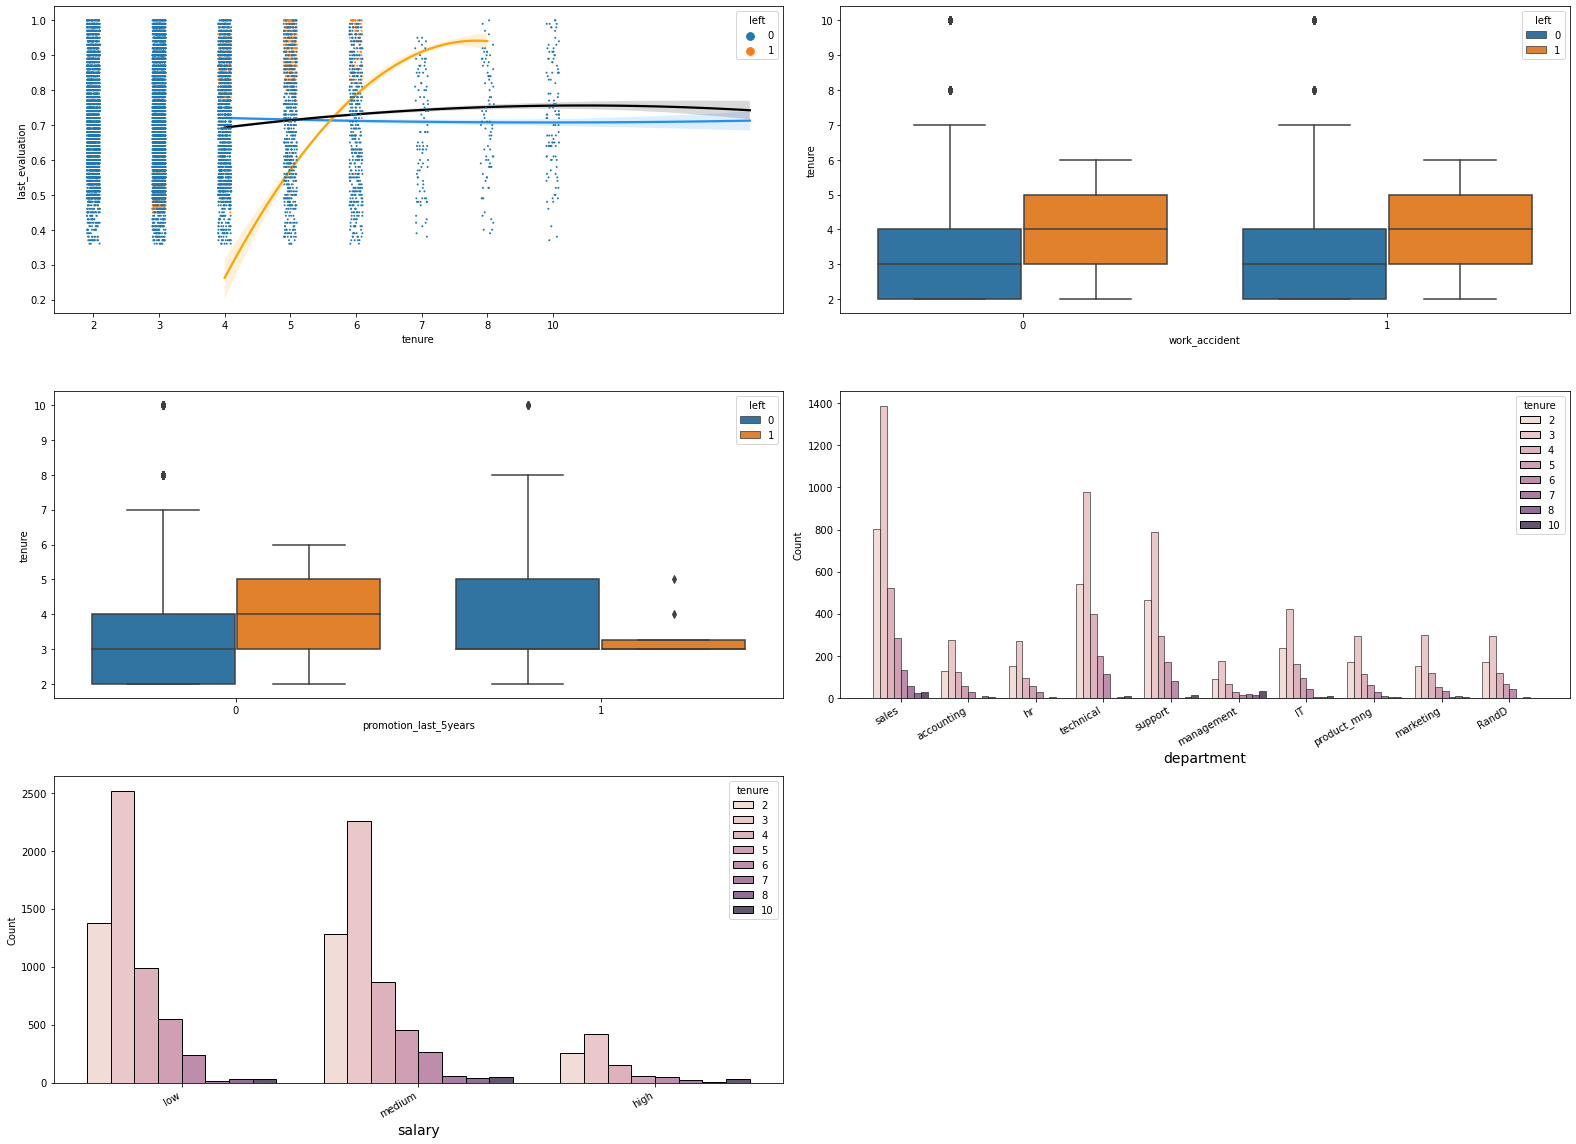

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (22,16))
axes = axes.flatten()
for i, col in enumerate(col_list_temp):
    if col in int_col:
        sns.boxplot(data=df, y='tenure', x=col, hue = 'left', ax = axes[i])
    elif col in cat_col:
        sns.histplot(data=df, x=col, hue = 'tenure', ax = axes[i], multiple = 'dodge', shrink = 0.8)
        axes[i].set_xticklabels(df[col].unique(), ha = 'right', rotation = 30)
        axes[i].set_xlabel(col, fontsize = 14)
    elif col == 'last_evaluation':
        sns.stripplot(data=df, y=col, x='tenure', size = 2, hue = 'left', ax = axes[i])
        sns.regplot(data=df[df['left']==0], y=col, x='tenure', scatter=False, order = 2, color='dodgerblue', ax = axes[i])
        sns.regplot(data=df[df['left']==1], y=col, x='tenure', scatter=False, order = 2, color='orange', ax = axes[i]) 
        sns.regplot(data=df, y=col, x='tenure', scatter=False, order = 2, color='black', ax = axes[i])
        
        
for i in range(len(axes)-len(col_list_temp)):
    axes[len(col_list_temp)+i].set_visible(False)

plt.tight_layout()
plt.show()

> There was an uptrend of `last_evaluation` along the `tenure` for the employees who left the company. The obvious starting point of the uptrend can be seen from `tenure` of 4. But for the stayed employees, `last_evaluation` were left_skewed (more employees clustered at higher `last_evaluation`) in all tenures. 
  
> `work_accident` and `promotion_last_5years` almost mimicked each other in terms of not showing obvious distribution distinction between binary groups of each variable, except for that a very concentrated group found in promoted employees where `tenure` of 3. This might be the indirect result of the big drop in 'stayed' group of `tenure` of 4: to refill the vacancies from internal.  

### **`salary`**  
  
> `salary` always play an crucial role in labor market, including retention and turn-over behaviours. Did `salary` reflect some insights in the company's issue?  

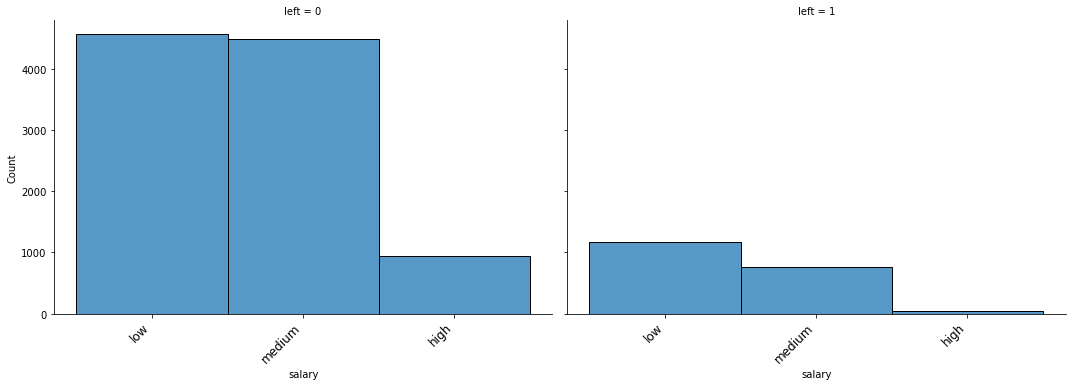

In [ ]:
g = sns.displot(df, x="salary", col="left", kde=False, height=5, aspect=1.5)


for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [ ]:
salary_left = pd.DataFrame(df.groupby(by='salary')['left'].value_counts()).unstack()
normalized_salary_left=pd.DataFrame(df.groupby(by='salary')['left'].value_counts(normalize = True)).unstack()

joined_df = pd.concat([salary_left,normalized_salary_left], axis = 1)
joined_df.columns = ['Left_0', 'Left_1', 'Left_0_Percentage', 'Left_1_Percentage']
joined_df

,Left_0,Left_1,Left_0_Percentage,Left_1_Percentage
salary,,,,
high,942,48,0.951515,0.048485
low,4566,1174,0.795470,0.204530
medium,4492,769,0.853830,0.146170


> In both stayed' and 'left' groups, as we expect, `salary` distributed with skewness to the right. On top of that, we can see that there were relatively small gaps in count between 'low' and 'medium'. But the gap became enormous between medium and high. It might be due to the categorization unfairness, or, which could be a little bit problematic, a glass ceiling between mid-management and C-levels. 
 
> The table shows a bar-to-bar comparison. The percentages of 'left' group remained in the range of 14.6% to 20.5% for medium and low `salary` level. But it significantly dropped to 4.8% when the `salary` level was high. 
  
> In some sense, `salary` worked well in retaining the employees. This is yet to be tested

In [ ]:
col_list_temp.remove('salary')

In [ ]:
cat_col.remove('salary')

In [ ]:
df['work_accident'].unique()

array([0, 1])

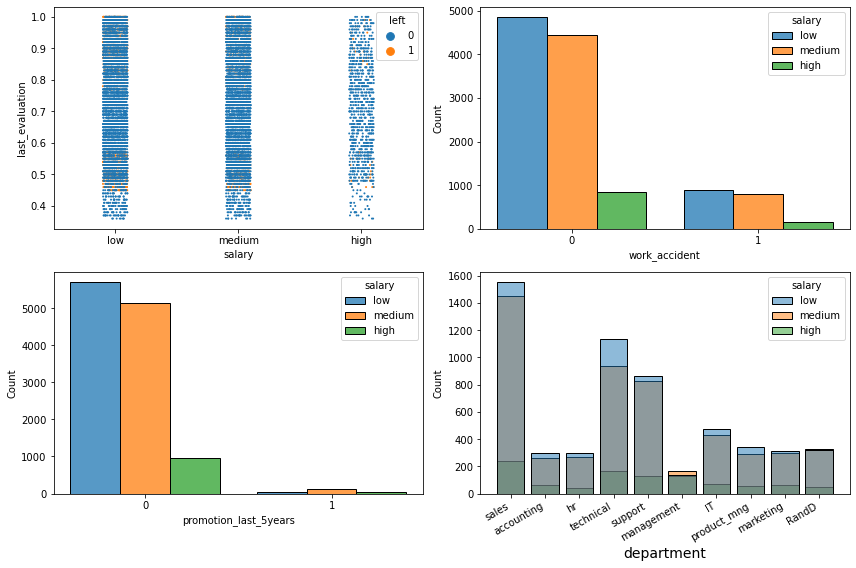

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(col_list_temp):
    if col in int_col:
        sns.histplot(data = df, x = col, kde = False,  hue = "salary", multiple = 'dodge', discrete = True, shrink = 0.8, ax = axes[i])
        axes[i].set_xticks([0, 1])
    elif col in cat_col:
        sns.histplot(data = df, x = col, hue = "salary", ax = axes[i], shrink = 0.8)
        axes[i].set_xticklabels(df[col].unique(), ha='right', rotation = 30)
        axes[i].set_xlabel(col, fontsize = 14)
    elif col == 'last_evaluation':
        sns.stripplot(data = df, y = col, x = 'salary', size = 2, hue = 'left', ax = axes[i])

for i in range(len(col_list_temp), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

> `salary` level did not by its own contribute too much on distribution shape of `last_evaluation`. 
  
> With `work_accident`, we cannot see distribution differences of `salary` in the two groups. In other words, given either an employee had had accident during work, the probability of having low `salary` level outnumbered that of having high level a lot. 
 
> But this situation did not mimic in `promotion_last_5years`. Although the the `salary` level employees who were not promoted showed a right-skewed distribution, that of the promoted demonstrated differently. The medium `salary` level outnumbered the other two levels in the promoted group. 
 
> In terms of the `salary` framework, there were no obvious distinctions among the `department`s except for management.   

### **`last_evaluation`**  
  
> Periodic appraisal have been a wide-spread human resource mean since 1950's all over the world, serving as a basis of salary review, task re-assessment, and forward-looking plan. Did it serve well in our case in light of retaining employees and interact with other variables?   

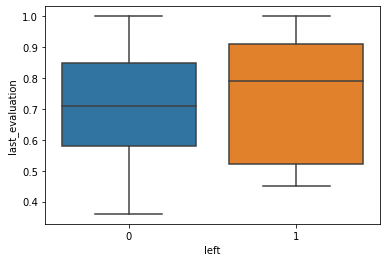

In [ ]:
sns.boxplot(data=df, x='left', y='last_evaluation')
plt.show();

> The medians of the `last_evaluation` were between 0.7 and 0.8, and the distributions looked alike each other, apart from the minimum of the `last_evaluation` was below 0.5 for the 'left' group.  
  
> This indicates that `last_evaluation` failed to function as a 'lure' to retain the employees. We can investigate if my interpretation stands with hypothesis testing. 

In [ ]:
col_list_temp.remove('last_evaluation')

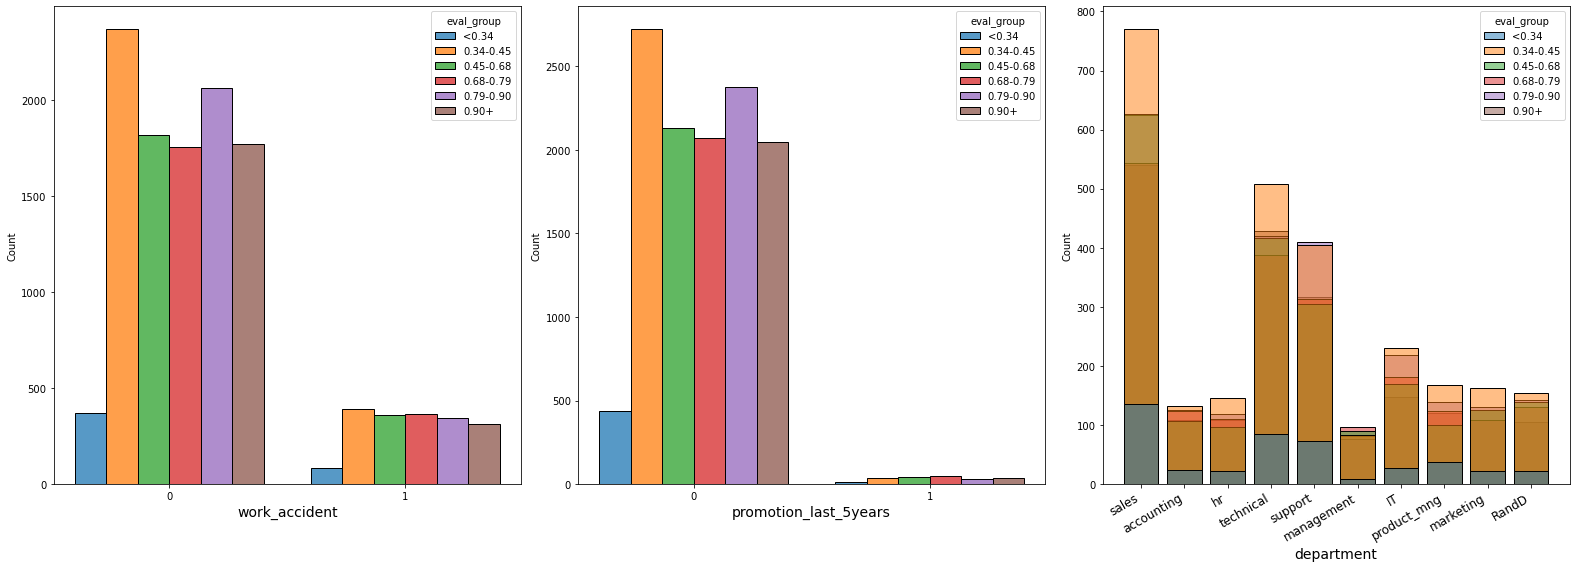

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
axes = axes.flatten()

bins = [0.34, 0.45, 0.57, 0.68, 0.79, 0.90, 1.02] 
labels = ['<0.34', '0.34-0.45', '0.45-0.68', '0.68-0.79', '0.79-0.90', '0.90+']
df['eval_group'] = pd.cut(df['last_evaluation'], bins=bins, labels=labels)

for i, col in enumerate(col_list_temp):
    if col in int_col:
        sns.histplot(data = df, x = col, kde = False,  hue = "eval_group", multiple = 'dodge', discrete = True, shrink = 0.8, ax = axes[i])
        axes[i].set_xticks([0, 1])
        axes[i].set_xlabel(col, fontsize = 14)
    elif col in cat_col:
        sns.histplot(data = df, x = col, hue = "eval_group", ax = axes[i], shrink = 0.8)
        axes[i].set_xticklabels(df[col].unique(), ha='right', rotation = 30, fontsize = 12)
        axes[i].set_xlabel(col, fontsize = 14)

for i in range(len(col_list_temp), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

> `last_evaluation` shape looked alike between the binary outcomes of the two variable `work_accident` and `promotion_last_5years`, except for the number of samples of promoted was relatively small. Here seemed no corrleation between `last_evaluation` and the two binary variables. 
 
> Again, different `department`s did not show correlation with the `last_evaluation`, like the `salary` case. 
   

### **`work_accident`**  
  
> `work_accident` is a binary variable which we did not include in the pairplot at the beginning of the visualizations. We can see a negatove correlation between `work_accident` and `left`. Let's look closer to assess its relationship with the remaining variables.  

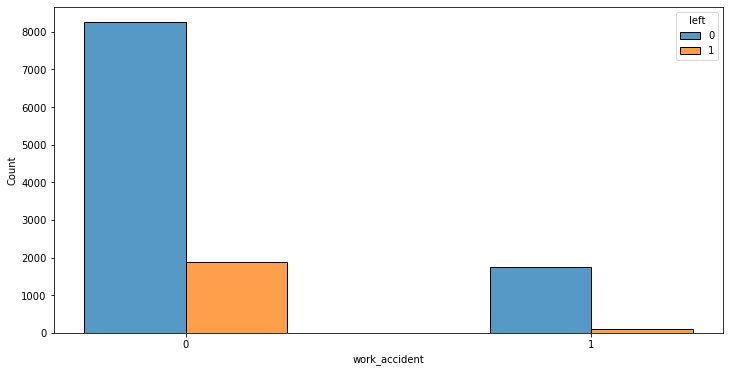

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(df, x="work_accident", hue="left", multiple = 'dodge', shrink = 0.5, discrete = True)
plt.xticks([0,1])
plt.show();

In [ ]:
print(f"Injured: {len(df[df['work_accident']==1])}")
print(f"Not Injured and Left: {len(df[(df['work_accident']==0)&(df['left']==1)])}")


Injured: 1850
Not Injured and Left: 1886


In [ ]:
accident_left = pd.DataFrame(df.groupby(by='work_accident')['left'].value_counts()).unstack()
normalized_accident_left=pd.DataFrame(df.groupby(by='work_accident')['left'].value_counts(normalize = True)).unstack()

joined_df = pd.concat([accident_left, normalized_accident_left], axis = 1)
joined_df.columns = ['Left_0', 'Left_1', 'Left_0_Percentage', 'Left_1_Percentage']
joined_df

,Left_0,Left_1,Left_0_Percentage,Left_1_Percentage
work_accident,,,,
0,8255,1886,0.814022,0.185978
1,1745,105,0.943243,0.056757


> There were $\frac{1}{4}$ employees who experienced accident during work, which was quite shocking. The number of injured employees was even less than that of the ones who did not have accident but leave. There was an urgent need for workplace safety enhancement. 
 
> Back to the data spread. Although the shape of the graphs looked similar, the ratio of left versus stayed differed by 3 folds. Those who had accident tended to stay in the company.  I would like to call a test to verify the difference. 

In [ ]:
col_list_temp.remove('work_accident')

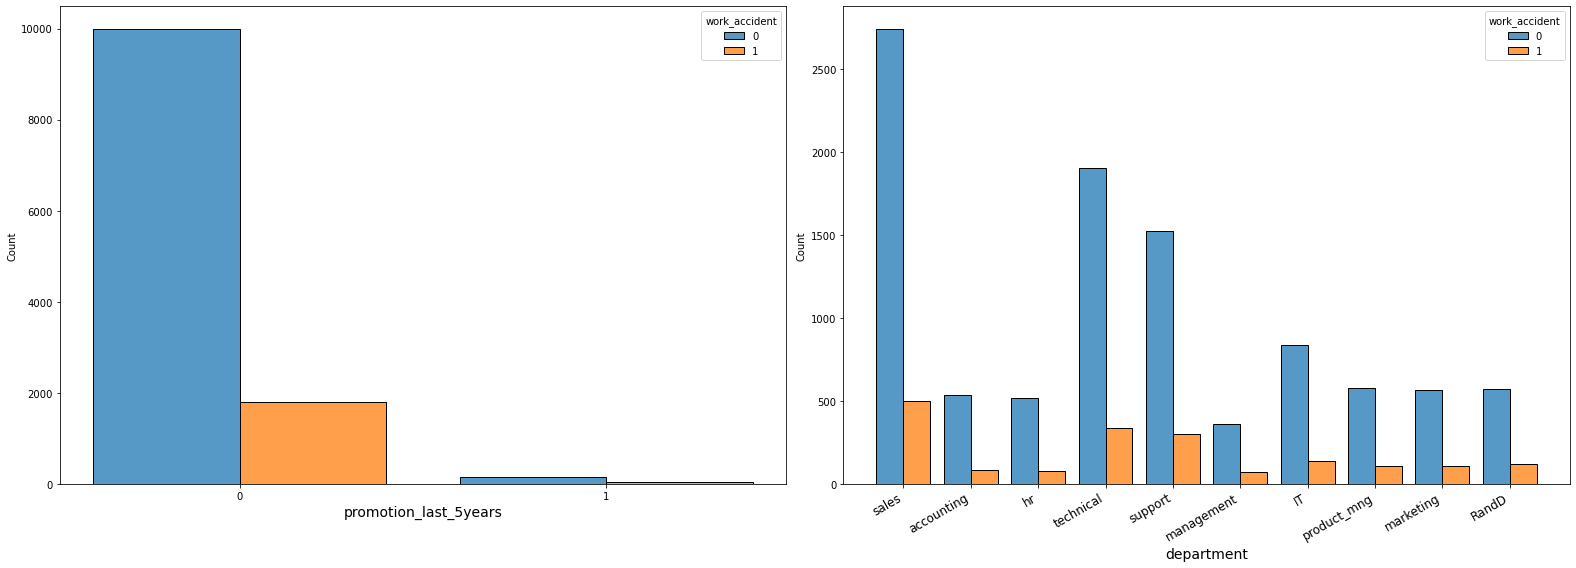

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
axes = axes.flatten()


for i, col in enumerate(col_list_temp):
    if col in int_col:
        sns.histplot(data = df, x = col, kde = False,  hue = "work_accident", multiple = 'dodge', discrete = True, shrink = 0.8, ax = axes[i])
        axes[i].set_xticks([0, 1])
        axes[i].set_xlabel(col, fontsize = 14)
    else:
        sns.histplot(data = df, x = col, hue = "work_accident", multiple = 'dodge', ax = axes[i], shrink = 0.8)
        axes[i].set_xticklabels(df[col].unique(), ha='right', rotation = 30, fontsize = 12)
        axes[i].set_xlabel(col, fontsize = 14)



plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(df.groupby(by='promotion_last_5years')['work_accident'].value_counts(normalize = True))

work_accident
promotion_last_5years work_accident               
0                     0                   0.847133
                      1                   0.152867
1                     0                   0.763547
                      1                   0.236453

In [ ]:
pd.DataFrame(df.groupby(by='department')['work_accident'].value_counts(normalize = True))

work_accident
department  work_accident               
IT          0                   0.857582
            1                   0.142418
RandD       0                   0.828530
            1                   0.171470
accounting  0                   0.859903
            1                   0.140097
hr          0                   0.866889
            1                   0.133111
management  0                   0.834862
            1                   0.165138
marketing   0                   0.839525
            1                   0.160475
product_mng 0                   0.841108
            1                   0.158892
sales       0                   0.846249
            1                   0.153751
support     0                   0.835805
            1                   0.164195
technical   0                   0.848930
            1                   0.151070

> The ratio of `work_accident` in different `promotion_last_5years` groups seemed to be different. Out of the total employees who were promoted, 23.6% had had accident during work, whereas only 15.3% of the unpromoted employees had had accidents. We can perform a test to verify. 

> From the table, we can see that the ratio of employees who had had accident during work was about 13 to 17% in every department. It did not look differentiated. Test needed again.

### **`department`**  
  
> Some would argue the retention rate differ in different departments no matter what business a company is in. I wonder if it was true for Salifort Motors.  

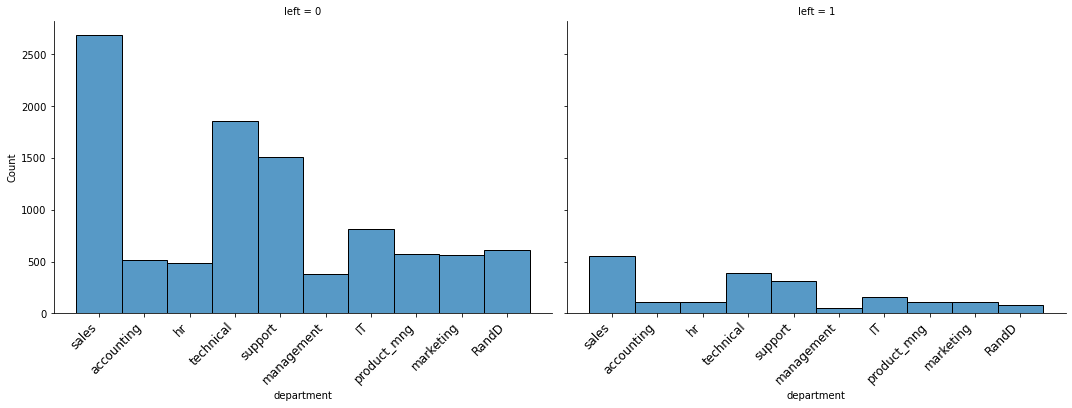

In [ ]:
g = sns.displot(df, x="department", col="left", kde=False, height=5, aspect=1.5)


for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [ ]:
dpmt_left = pd.DataFrame(df.groupby(by='department')['left'].value_counts()).unstack()
normalized_dpmt_left=pd.DataFrame(df.groupby(by='department')['left'].value_counts(normalize = True)).unstack()

joined_df = pd.concat([dpmt_left,normalized_dpmt_left], axis = 1)
joined_df.columns = ['Left_0', 'Left_1', 'Left_0_Percentage', 'Left_1_Percentage']
joined_df

,Left_0,Left_1,Left_0_Percentage,Left_1_Percentage
department,,,,
IT,818,158,0.838115,0.161885
RandD,609,85,0.877522,0.122478
accounting,512,109,0.824477,0.175523
hr,488,113,0.811980,0.188020
management,384,52,0.880734,0.119266
marketing,561,112,0.833581,0.166419
product_mng,576,110,0.839650,0.160350
sales,2689,550,0.830195,0.169805
support,1509,312,0.828666,0.171334


> Although from the FacetGrid we see similar patterns across departments, in the table, the `left` percentage vary from 11.9% (management) to 17.55%(hr) , almost 50% difference. Is the argument valid for the company? Hypothesis testing calling!

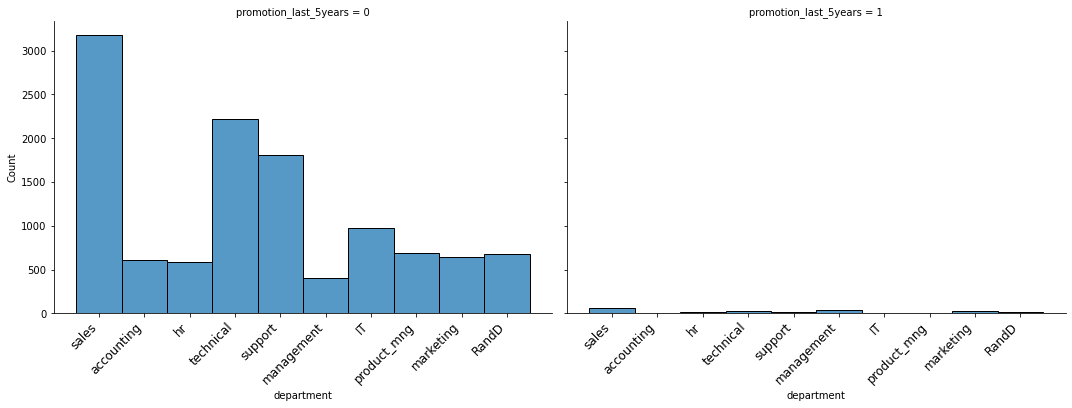

In [ ]:
g = sns.displot(df, x="department", col="promotion_last_5years", kde=False, height=5, aspect=1.5)


for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [ ]:
dpmt_promo = pd.DataFrame(df.groupby(by='department')['promotion_last_5years'].value_counts()).unstack()
normalized_dpmt_promo=pd.DataFrame(df.groupby(by='department')['promotion_last_5years'].value_counts(normalize = True)).unstack()

joined_df = pd.concat([dpmt_promo,normalized_dpmt_promo], axis = 1)
joined_df.columns = ['promo_0', 'promo_1', 'promo_0_Percentage', 'promo_1_Percentage']
joined_df

,promo_0,promo_1,promo_0_Percentage,promo_1_Percentage
department,,,,
IT,974.0,2.0,0.997951,0.002049
RandD,673.0,21.0,0.969741,0.030259
accounting,611.0,10.0,0.983897,0.016103
hr,590.0,11.0,0.981697,0.018303
management,400.0,36.0,0.917431,0.082569
marketing,646.0,27.0,0.959881,0.040119
product_mng,686.0,NaN,1.000000,NaN
sales,3181.0,58.0,0.982093,0.017907
support,1805.0,16.0,0.991214,0.008786


> Product manufacturing department did not have any employees promoted, whereas 8.25% managers got promotions. Other `dpartment`s exhibited varied percentage of promotion. This already illustrated that `department` and `promotion_last_5years` had certain level of relation. 

### **`promotion_last_5years`**  
  
> The very last independent variable is `promotion_last_5years`. It is also the last binary that was not included in the pairplot. In the correlation matrix we see that the correlation coefficient is -0.045. Let's have a closer look.   
  

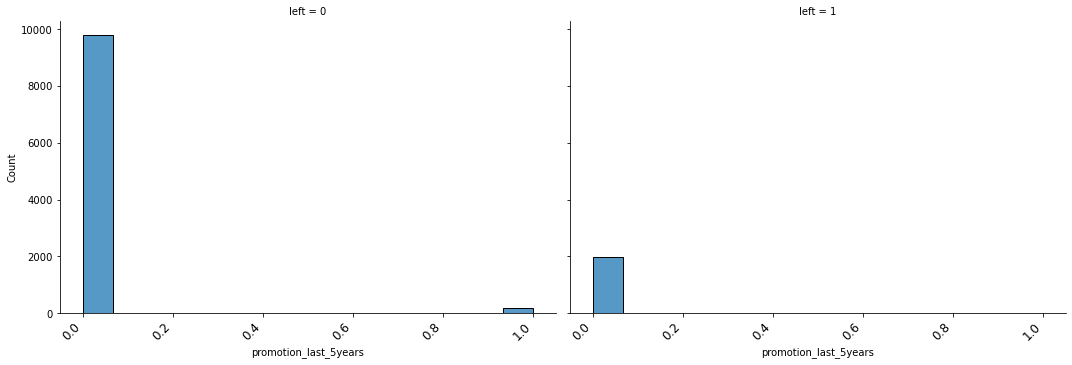

In [ ]:
g = sns.displot(df, x="promotion_last_5years", col="left", kde=False, height=5, aspect=1.5)


for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [ ]:
promo_left = pd.DataFrame(df.groupby(by='promotion_last_5years')['left'].value_counts()).unstack()
normalized_promo_left=pd.DataFrame(df.groupby(by='promotion_last_5years')['left'].value_counts(normalize = True)).unstack()

joined_df = pd.concat([promo_left,normalized_promo_left], axis = 1)
joined_df.columns = ['Left_0', 'Left_1', 'Left_0_Percentage', 'Left_1_Percentage']
joined_df

,Left_0,Left_1,Left_0_Percentage,Left_1_Percentage
promotion_last_5years,,,,
0,9805,1983,0.831778,0.168222
1,195,8,0.960591,0.039409


In [ ]:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [ ]:
df['promotion_last_5years'].value_counts()[1]/df['promotion_last_5years'].value_counts()[0]

0.0172209026128266

> Last 5 years only 203 got promotion, only 1.72%, 0.344% each year. Given that the company has been suffering from high turn-over rate, this promotion figure seemed extremely low. 
  
> The as the data is extremely imbalanced, the shapes in the graph cannot clearly indicate any differences. So we should shift our focus to the table. Here, we can easily spot that more than 4 time of percentage of employees who had not been promoted left the company than those who had been promoted. This means that `promotion_last_5years` appeared to have some notable correlation with `left`. Let's see.  

### Insights

> It seemed true that the low `satisfaction_level` and `number_project` played important parts in the high turnover rate. Longer-than-average working hours, and levels of `last_evaluation` were also accountable for the rate. 
  
> Although there did not seem that employees who left the company had experienced some sort of accidents during work on average, there were $ \frac {1}{4}$ of all employees had accidents, which was quite shocking. It reflected the need for improvement of safety in workplace and management.  
  
> We have some up with some hypotheses to be tested, namely: 
  
> 1. All independent variables on `left`. 
> 2. All predictive independent variables on each other.
> 3. Some Individual testings in particular.

## Step 3. Hypothesis Testing

> First we have to identify what test to be performed for each hypothesis. 
  
> Recall that we have saved copies of the columns. let's review them.

In [ ]:
print(f"num_col_copy: {num_col_copy}\ncat_col_copy: {cat_col_copy}\nbin_col_copy: {bin_col_copy}")

num_col_copy: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']
cat_col_copy: ['department', 'salary']
bin_col_copy: ['work_accident', 'promotion_last_5years', 'left']


> **1. Independent variables on `left`**

> First we figure out what tests are to be used:
For the numerical variables, we can use independent t-test. 
For the categorical and binary columns, we will use two-way Chi-square test. 
However, for `salary`, we will call the Kruskal-Wallis H test, as it is apparently skewed. 
  
> Here we drop the `left` column from `bin_col_copy` and `salary` from `cat_col_copy`
. And then we define functions. Next we call them with the column list copies.  

In [ ]:
bin_col_copy.remove('left')
bin_col_copy

['work_accident', 'promotion_last_5years']

In [ ]:
cat_col_copy.remove('salary')

In [ ]:
def t_test_(df, col, mask = 'left'):
    dfs = df[df[mask]==0]
    dfl = df[df[mask]==1]
    t_stat, p_value = stats.ttest_ind(a = dfs[col], b = dfl[col] , equal_var=False)
    return t_stat, p_value

In [ ]:
def t_test_table(col_list, t_stat_list, p_value_list):
    results = pd.DataFrame({'Feature':col_list,
                            'T statistic':t_stat_list,
                            'p-value':p_value_list})
    return results

In [ ]:
def chisquare_test_(df,by_col,col='left'):
    contingency_array =  df.groupby(by=by_col)[col].value_counts().unstack(fill_value=0).values
    chi2_stat, p_value, dof, expected = stats.contingency.chi2_contingency(contingency_array)
    return chi2_stat, p_value, dof, expected

In [ ]:
def chi2_test_table(col_list, chi2_list, p_value_list, dof_list):
    results = pd.DataFrame({'Feature':col_list,
                            'chi2 Statistic':chi2_list,
                            'p-value':p_value_list,
                            'Degree of Freedom':dof_list})
    return results

> Perform T-Test: 
 
> Null Hypothesis and Alternative Hypothesis: 

In [ ]:
for col in num_col_copy:
    print(f"H0: There was no difference in {col} between employees who stayed and those who quitted.")
    print(f"HA: There was difference in {col} between employees who stayed and those who quitted.")
    print('-----')
print('We choose 5% as our significance level.')    

H0: There was no difference in satisfaction_level between employees who stayed and those who quitted.
HA: There was difference in satisfaction_level between employees who stayed and those who quitted.
-----
H0: There was no difference in last_evaluation between employees who stayed and those who quitted.
HA: There was difference in last_evaluation between employees who stayed and those who quitted.
-----
H0: There was no difference in number_project between employees who stayed and those who quitted.
HA: There was difference in number_project between employees who stayed and those who quitted.
-----
H0: There was no difference in average_monthly_hours between employees who stayed and those who quitted.
HA: There was difference in average_monthly_hours between employees who stayed and those who quitted.
-----
H0: There was no difference in tenure between employees who stayed and those who quitted.
HA: There was difference in tenure between employees who stayed and those who quitted.
---

In [ ]:
t_stat_list = []
p_value_list = []
for col in num_col_copy:
    t_stat, p_value = t_test_(df, col)
    t_stat_list.append(t_stat)
    p_value_list.append(p_value)
result_table = t_test_table(num_col_copy, t_stat_list, p_value_list)
result_table

,Feature,T statistic,p-value
0,satisfaction_level,35.889305,1.193954e-228
1,last_evaluation,-1.298041,1.943907e-01
2,number_project,-2.307798,2.110164e-02
3,average_monthly_hours,-6.368797,2.267947e-10
4,tenure,-24.049801,5.787450e-119


> `satisfaction_level`, `number_project`, `average_monthly_hours`, and `tenure` have the p-value smaller than our significance threshold 5%. Therefore it is statistically significant to reject the Null Hypotheses and conclude that there were differences in the above mentioned features between employees who stayed and those who quitted.  
  
> In other words, these features had significant association with the `left` status. We should consider including them in our Logistic Regression Model. But we have to be careful with the collinearity. We will carry out these tests. 
  
> Meanwhile, p-value of `last_evaluation` is 19.44%, higher than our pre-determined threshold. Therefore we fail to reject the Null Hypothesis claiming that there was no difference in `last_evaluation` between the two groups. Thus we may consider dropping `last_evaluation` as our independent variable in Logistic Regression Model.

In [ ]:
chi2_list = []
p_value_list = []
dof_list = []
E_list = []

for col in (cat_col_copy + bin_col_copy):
    chi2_stat, p_value, dof, expected = chisquare_test_(df,col)
    chi2_list.append(chi2_stat)
    p_value_list.append(p_value)
    dof_list.append(dof)
result_table = chi2_test_table(cat_col_copy + bin_col_copy, chi2_list, p_value_list, dof_list)
result_table

,Feature,chi2 Statistic,p-value,Degree of Freedom
0,department,20.857513,1.329833e-02,9
1,work_accident,187.737834,9.911243e-43,1
2,promotion_last_5years,22.992128,1.626662e-06,1


> All of these three variables have p-values which are smaller than our pre-determined threshold 5%. Therefore we can reject the Null hypothesis in favour of the alternative hypothesis. In other words, they are all statistically significantly related to whether an employee chose to stay or quit. 

> In particular, the chi-square test statistic is as high as 187.74, meaning that there was a big difference in `work_accident` between employees who stayed and those who left. Recall that the EDA showed those who had accident during work tended to stay. This result supports the hypothesis. 

> Meanwhile, we previously observed that HR stood out high in turnover rate, while management team tended to stay. The test result also supports this hypothesis.  
  
> Next, We conduct a Kruskal-Wallis test for `salary`.  

In [ ]:
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary_encoded'] = df['salary'].map(salary_mapping)

stayed_salary = df[df['left'] == 0]['salary_encoded']
left_salary = df[df['left'] == 1]['salary_encoded']
h_stat, p_value = stats.kruskal(stayed_salary, left_salary)

# Print results
pd.DataFrame([{'Feature':'Salary',
                            'Kruskal-Wallis H Statistic':h_stat,
                            'p-value':p_value}]).reset_index(drop=True)

,Feature,Kruskal-Wallis H Statistic,p-value
0,Salary,155.595396,1.037727e-35


> As the p-value is smaller than the significance level of 5%, we can reject the Null hypothesis in favour of the alternative and conclude that there was difference in `salary` between the two groups of employees. 
 
> We consider including this in our Logistic Regression Model.  
  
> **2. Among independent variables**  

In [ ]:
# Correct the usage of pd.get_dummies for both 'salary' and 'department'
df_copy = df.copy()
df_copy = pd.get_dummies(df_copy, columns=['department'], drop_first=True)

# List of columns for VIF calculation (excluding 'left', 'hours_group', 'eva_group', categorical and binary)
vif_col = [col for col in df_copy.columns if col not in cat_col and col not in bin_col and col not in ['left', 'hours_group', 'eval_group','salary']]

# Add constant column for VIF calculation
X = add_constant(df_copy[vif_col])

# Check for missing values and drop them if needed
X = X.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Features,VIF
0,const,58.820929
1,satisfaction_level,1.061036
2,last_evaluation,1.146008
3,number_project,1.225746
4,average_monthly_hours,1.168811
5,tenure,1.073165
6,salary_encoded,1.016334
7,department_RandD,1.612321
8,department_accounting,1.552475
9,department_hr,1.535814


In [ ]:
corr_matrix = df_copy[vif_col + bin_col].corr()
condition_number = cond(corr_matrix)

print(f"Condition Number: {condition_number}")

Condition Number: 17.94185639029408


> The VIF table shows no value larger than 5 (we can ignore the constant value). It implies the multicollinearity assumption is not violated in the numeric variables.

> When the conditional number is greater than 30, there exists the problem of multicolliearity. Here, as the number is 17.32, it shows the assumption is also not violated in the binary variables.
 
> **3. Some particular testings** 

In [ ]:
for col in ['promotion_last_5years', 'department']:
    print(f"H0: There was no difference in {col} between employees who had accident during work and those who did not.")
    print(f"HA: There was difference in {col} between employees who had accident during work and those who did not.")
    print('-----')
print('We choose 5% as our significance level.')    

H0: There was no difference in promotion_last_5years between employees who had accident during work and those who did not.
HA: There was difference in promotion_last_5years between employees who had accident during work and those who did not.
-----
H0: There was no difference in department between employees who had accident during work and those who did not.
HA: There was difference in department between employees who had accident during work and those who did not.
-----
We choose 5% as our significance level.


In [ ]:
chi2_list = []
p_value_list = []
dof_list = []
E_list = []

for column in ['promotion_last_5years', 'department']:
    chi2_stat, p_value, dof, expected = chisquare_test_(df,'work_accident', col = column)
    chi2_list.append(chi2_stat)
    p_value_list.append(p_value)
    dof_list.append(dof)
result_table = chi2_test_table(['promotion_last_5years', 'department'], chi2_list, p_value_list, dof_list)
result_table
    

,Feature,chi2 Statistic,p-value,Degree of Freedom
0,promotion_last_5years,10.054742,0.001520,1
1,department,7.905691,0.543678,9


> As in our further EDA, we hypothesized that there was difference in `promotion_last_5years` between the employees who had accident during work and those who did not. From the above `result_table`, the p-value of the test is 0.15%, lower than the significance threshold. Hence we can statistically significantly reject the Null Hytpothesis and conclude that alternative that there is difference. 
 
> On the other hand, the chi2 test p-value is 54.37% for `department`, much higher than the threshold. Thus, we fail to reject the null hypothesis. It also supports our hypothesis that there are no apparent difference among the `department`s in terms of the accident rate. 

In [ ]:
for col in ['average_monthly_hours', 'salary']:
    print(f"H0: There was no difference in {col} between employees who had accident during work and those who did not.")
    print(f"HA: There was difference in {col} between employees who had accident during work and those who did not.")
    print('-----')
print('We choose 5% as our significance level.')  

H0: There was no difference in average_monthly_hours between employees who had accident during work and those who did not.
HA: There was difference in average_monthly_hours between employees who had accident during work and those who did not.
-----
H0: There was no difference in salary between employees who had accident during work and those who did not.
HA: There was difference in salary between employees who had accident during work and those who did not.
-----
We choose 5% as our significance level.


In [ ]:

t_stat, p_value_t = t_test_(df, 'average_monthly_hours', mask='work_accident')


result_table = pd.DataFrame({
    'Feature': ['average_monthly_hours'],
    't Statistic': [t_stat],
    'p value for t test': [p_value_t] 
})


chi2_stat, p_value_chi2, dof, expected = chisquare_test_(df, 'work_accident', col='salary')


result_table = pd.concat([result_table, pd.DataFrame({
    'Feature': ['salary'],
    'chi2 Statistic': [chi2_stat],  
    'p-value': [p_value_chi2],  
    'Degree of Freedom': [dof]})]).reset_index(drop=True)


result_table

,Feature,t Statistic,p value for t test,chi2 Statistic,p-value,Degree of Freedom
0,average_monthly_hours,1.451603,0.146731,NaN,NaN,NaN
1,salary,NaN,NaN,0.162901,0.921778,2.0


> Both p-values are smaller than 5%, thus we fail to reject the Null Hypothesis. It means that we cannot see a non-random relationship between working hours and salary with `work_accident`. It made no difference in `average_monthly_hours` and `salary` between th employees who had accident during work and those who did not.

> We can go to the next stage now.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?  
  
> `work_accident` did not negatively affect the turnover rate, which surprises me. 
 
> Employees who had accident during work tended to stay in the company. This might be a bit interesting. We also tested the below: is it that they contributed themselves to the company so much that they no only wished to stay, but worked so hard to until accident? Or the other way round, was it that the company made sufficient compensation to retain these employees? Both answers are **NO**.

> `salary` levels of the employees who stays and those who left were different, meaning that those who left the company on average had lower wages, or alternatively speaking, the company had done well in retaining the employees by `salary` differentiation. 
 
> Turnover varied across `department`s. We assessed that the HR had higher turnover rate while management had lowest, by the difference of about 50%. Our test confirmed the difference significant. 


  
- Which independent variables did you choose for the model and why?    

 
> For Logistic Regression model, I would like to include all independent variables (leaving `left` as our target variable), as the tests conducted above suggest that they were all related to the target variable, except for `last_evaluation`, which the test result does not show a statistically significant relationship. 

  
- Are each of the assumptions met?    

> 1. Outcome variable is categorical: ✅ 
> 2. Observations are independent of each other: ✅ 
> 3. No severe multicollinearity among X variables: ✅ 
> 4. No extreme outliers: ✅ (Outliers do exist in tenure but they are not extreme and it is essential to include them in our model. 
> 5. Linear relationship between each X variable and the logit of the outcome variable: ✅ 
> 6. Sufficiently large sample size: ✅
  
- How well does your model fit the data?    

 
> It is yet to be assessed.
  
- Can you improve it? Is there anything you would change about the model?    

 
> We can come back with it later on.  
  
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)    

 
> Krudsal Wallis H test in statsmodel: https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.kruskal.html#statsmodels.sandbox.stats.multicomp.MultiComparison.kruskal
  
- Do you have any ethical considerations in this stage?  
 

 
> Although work accidents were positively associated with employee retention, we strongly recommend that our company enhance workplace safety for ethical reasons.



## Step 4. Model Building, Step 5. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

> I am to predict the binary variable `left`.

### Identify the types of models most appropriate for this task.

> For categorical variable to predict, linear and multi-linear regression model are not appropriate. I will choose Logistic Regression Model, and tree based model and then select a champion.

### Modeling

Add as many cells as you need to conduct the modeling process.

> **1. Logistic Regression Model** 


> Let's review our df_copy and organize into the form we need in Logistic Regression Model building

In [ ]:
df_copy.dtypes

satisfaction_level         float64
last_evaluation            float64
number_project               int64
average_monthly_hours        int64
tenure                       int64
work_accident                int64
left                         int64
promotion_last_5years        int64
salary                      object
hours_group               category
eval_group                category
salary_encoded               int64
department_RandD             uint8
department_accounting        uint8
department_hr                uint8
department_management        uint8
department_marketing         uint8
department_product_mng       uint8
department_sales             uint8
department_support           uint8
department_technical         uint8
dtype: object

In [ ]:
df_copy.drop(columns = ['left','hours_group','eval_group','salary','last_evaluation'], inplace = True)
df_copy.dtypes

satisfaction_level        float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
promotion_last_5years       int64
salary_encoded              int64
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

> Sample counts of `left`:

In [ ]:
df['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

> The data is imbalance. But it is not up to 9:1. So we just add 'stratify = y' in train_test_split as argument instead of upsampling or downsampling.
  
> Splitting train, test subsets and build the Logistic Regression Model: 
 
> My favorite number is 4. Let's make it the random_state through out the process. 

In [ ]:
y = df['left']
X0 = df_copy

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y, random_state=4)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=4)

In [ ]:
Logreg_model = LogisticRegression(max_iter=1000)

Logreg_clf = LogisticRegression().fit(X_tr_scaled,y_tr)

Logreg_y_pred = Logreg_clf.predict(X_val)

In [ ]:
coefficients = Logreg_clf.coef_.flatten()

features = X0.columns

odds_ratios = np.exp(coefficients)

odds_ratios_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios})


baseline_logit = 0 

probabilities = 1 / (1 + np.exp(-(baseline_logit + coefficients)))  

odds_ratios_df['Probability Change'] = probabilities

odds_ratios_df

,Feature,Coefficient,Odds Ratio,Probability Change
0,satisfaction_level,-0.962055,0.382107,0.276467
1,number_project,-0.296325,0.743545,0.426456
2,average_monthly_hours,0.229003,1.257346,0.557002
3,tenure,0.387478,1.473260,0.595675
4,work_accident,-0.465788,0.627640,0.385614
5,promotion_last_5years,-0.153645,0.857576,0.461664
6,salary_encoded,-0.377494,0.685577,0.406731
7,department_RandD,-0.079475,0.923601,0.480142
8,department_accounting,0.004860,1.004872,0.501215
9,department_hr,0.041418,1.042288,0.510353


> Interpretation: 
 
> Negative coefficient: A negative coefficient means that as the feature increases, the likelihood of employees leaving decreases. 
 
> Take `satisfaction_level` as an examply. As it increases, the likelhood of leaving decreases. 

> Magnitude: the larger the coefficient, the stronger the relationship between the feature and the likelyhood of employee leaving. 

> Probability-wise speaking, for one unit of standard deviation increase in `satisfaction_level`, we can expect to see a 27.64% decrease in probability of employees leaving, given the baseline of 50% leaving. 


In [ ]:
Logreg_clf.intercept_

array([-2.0926701])

In [ ]:
Logreg_clf.predict_proba(X_test_scaled)[::,-1]

array([0.007131  , 0.02178642, 0.34340449, ..., 0.14853438, 0.04336565,
       0.15551697])

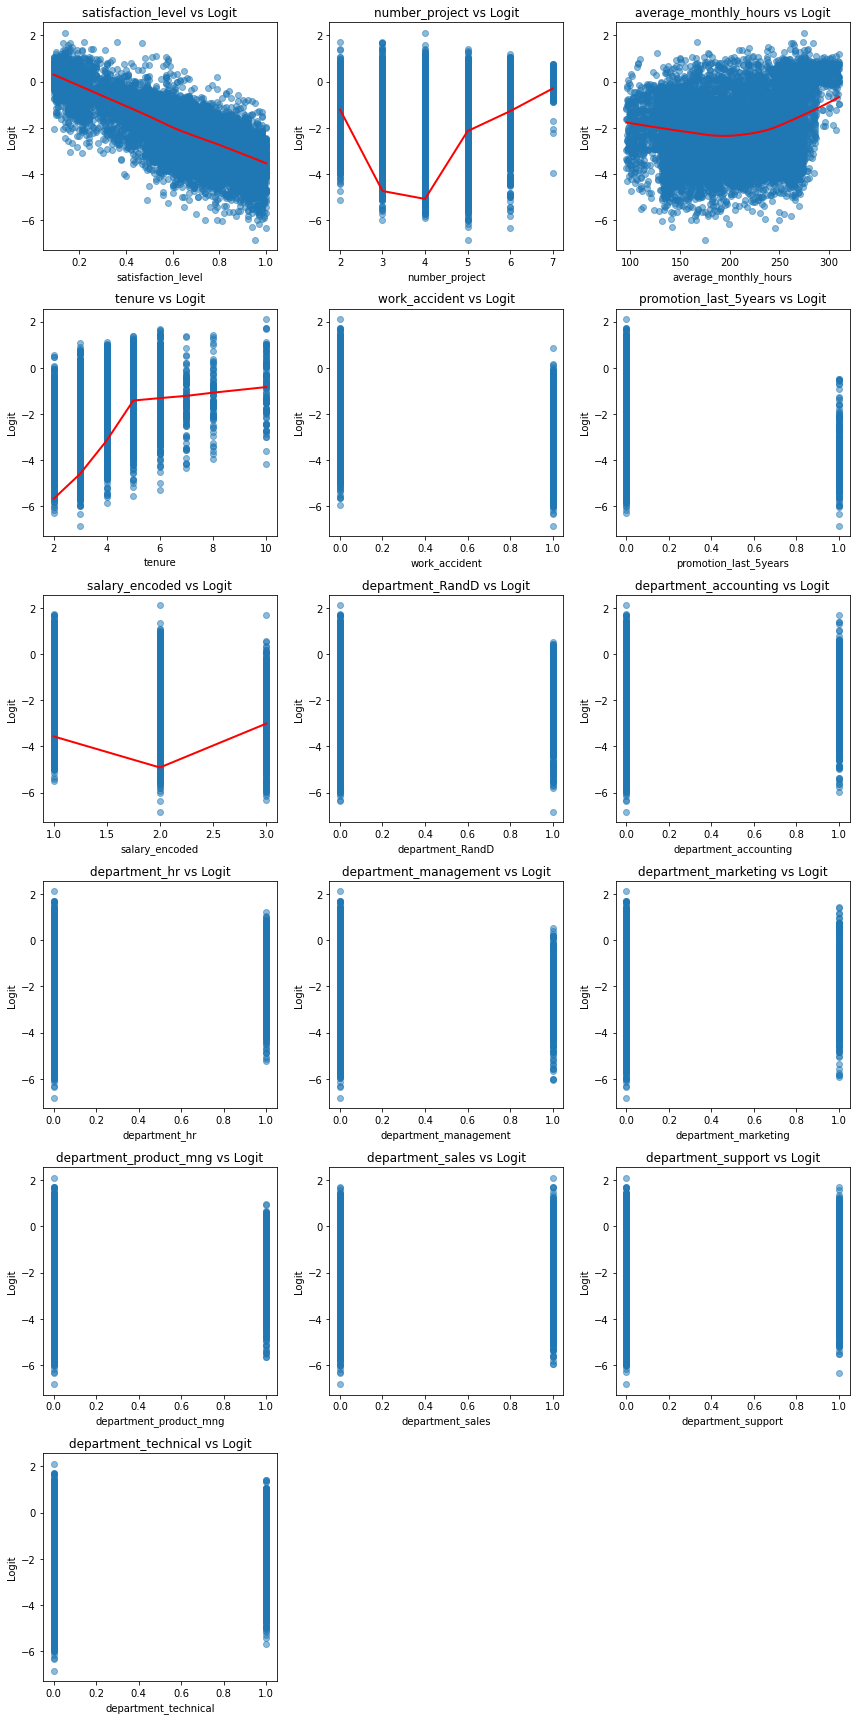

In [ ]:
logit = np.log(Logreg_clf.predict_proba(X)[:, 1] / (1 - Logreg_clf.predict_proba(X)[:, 1]))

plt.figure(figsize=(12, 4 * (len(X0.columns) // 3 + 1)))

for i, col in enumerate(X0.columns):
    plt.subplot(len(X0.columns) // 3 + 1, 3, i + 1)
    
    sns.regplot(
        x=X0[col], 
        y=logit, 
        scatter_kws={'alpha': 0.5},  
        line_kws={'color': 'red', 'linewidth': 2},  
        lowess=True)
    
    plt.xlabel(col)
    plt.ylabel('Logit')
    plt.title(f'{col} vs Logit')

plt.tight_layout()
plt.show()

> The above plots show the linearity assumptions condition.  `satisfaction_level` and `average_monthly_hours` follow a relatively linear relationship with the logit of `left` outcomes. 
 
> For the other plots, as the independent variables are either categorical or binary, it is normal to see broken lines depicting the relationships. 
 
> So the assumption of linearity is not violated. ✅

> **2. Machine Learning Models**
 
>    A. Random Forest
  
> We set up hyper parameters to conduct GridSearchCV to build a random forest model as immediate below. After fitting the scaled training data, we have built an optimal model, and use the best_estimator_ to visualize the model and feature importance. 

> We have to point out that we will have to specify a metric as a selection base. As our target is to identify the employees who left, and the potential costs of failing to label one from all of the left employees are assumed to be higher than that caused by incorrectly labelling one who did not leave actually. Therefore, logically we will pass `recall` score as the refit argument, and also the metric to base on in model comparison. 
 
> However, earlier we figured out that the data is imbalanced. `recall` may not effectively reflect the predictive power of the model. Thus we choose `f1` as our parameter to pass in to the model, as it by definition harmonically balances the `precision` and `recall` scores in light of imbalanced data. 

In [ ]:
hyper_param = {'n_estimators':[50,75],
              'max_depth':[10,50],
              'min_samples_leaf':[5,10],
              'min_samples_split':[0.01,0.05],
              'max_features':['sqrt'],
              'max_samples':[0.3,0.7]}

In [ ]:
rf = RandomForestClassifier(random_state = 4)
rf_val = GridSearchCV(rf, hyper_param, cv = 5, refit = 'f1', n_jobs = -1, verbose = 1 )

In [ ]:
%time
rf_val.fit(X_tr, y_tr)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   37.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=4,
                                   

In [ ]:
rf_opt_params = rf_val.best_params_
rf_opt_params = {key: [value] for key, value in rf_opt_params.items()}

In [ ]:
rf_opt =  GridSearchCV(rf, rf_opt_params, cv = 5, refit = 'f1', n_jobs = -1, verbose = 1 )

In [ ]:
%time
rf_opt.fit(X_tr, y_tr)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=4,
                                   

In [ ]:
rf_y_pred = rf_opt.predict(X_val)

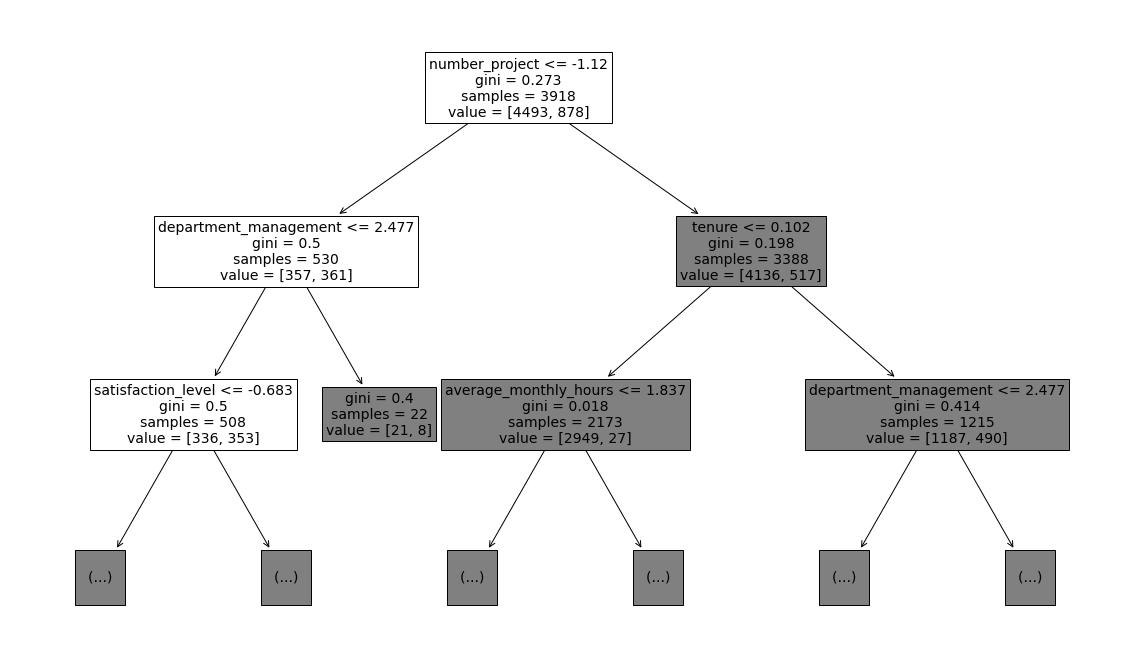

In [ ]:
best_rf = rf_opt.best_estimator_
plt.figure(figsize=(20,12))
plot_tree(best_rf[0], max_depth=2, fontsize=14, feature_names=X0.columns);

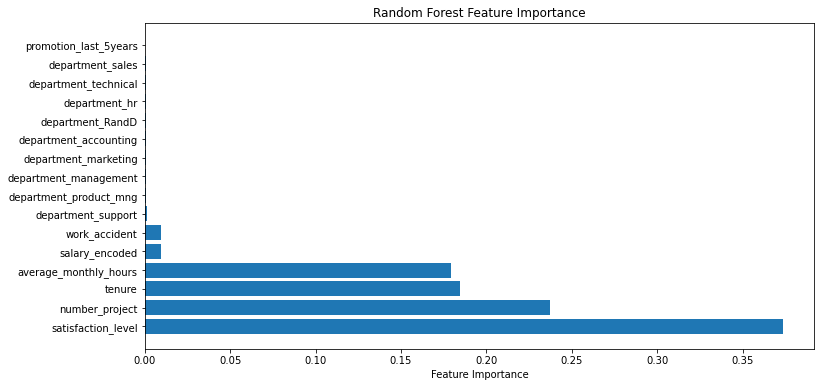

In [ ]:
feature_importance = best_rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X0.columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

> Interpretation: 

>  A random forest builds multiple decision trees on random subsets of the data and combines their predictions, adjusting feature importance based on how each contributes to the model's accuracy. For this reason, tree-based models are often considered as 'black-box model'; unlike regression models, there are no such thing called coefficient to explain **how** the features predict the outcome variable in the tree-based models. Instead, what we can do is to visualize **how important** each feature involves in the prediction.
  
> Here we can see that `satisfaction_level` tops the list followed by `number_project`, `tenure` and `average_monthly_hours`.  

> **2. Machine Learning Models**
 
>    B. XGBoost Model
  
> The XGBoost model follows a similar pipeline to random forest, but its focus is on iteratively adjusting the weights of the errors it makes. It emphasizes improving predictions by giving more weight to misclassified data in each iteration.

> Therefore, we configure our parameters first, and follow similar steps along.
 
> Again, we choose `f1` score as our refit baseline metric.

In [ ]:
xgb = XGBClassifier('binary:logistic',random_state = 4)

In [ ]:
cv_params = {'max_depth': [4,6], 'min_child_weight': [3,5],
             'learning_rate': [0.1,0.2,0.3],'n_estimators': [5,10,15],
             'subsample': [0.7],'colsample_bytree': [0.7]}
scoring = {'precision','recall','accuracy','f1'}

In [ ]:
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, refit = 'f1', cv = 5, verbose = 1, n_jobs = -1)

In [ ]:
%time

### YOUR CODE HERE ###
xgb_cv.fit(X_tr, y_tr)
xgb_cv

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   14.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=4,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0

In [ ]:
xgb_opt_params = xgb_cv.best_params_
xgb_opt_params = {key: [value] for key, value in xgb_opt_params.items()}

In [ ]:
xgb_opt = GridSearchCV(xgb, xgb_opt_params, scoring = scoring, refit = 'f1', cv = 5, verbose = 1, n_jobs = -1)

In [ ]:
%time
xgb_opt.fit(X_tr, y_tr)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=4,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0

In [ ]:
xgb_y_pred = xgb_opt.predict(X_val)

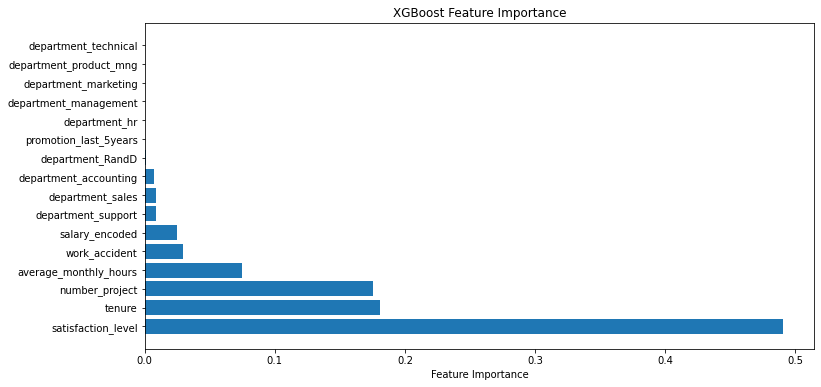

In [ ]:
best_xgb = xgb_opt.best_estimator_
feature_importance = best_xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X0.columns,
    'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

> Interpretation:

> As expected, XGBoost has the feature importances framework similar to random forest model.

> Now we have all three models developed. We have also saved the predictions with each model. Heading to next stage, we compare these models with the predictions on the basis of the model metrics.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






> With the models built and predictions made above, we are now holding enough basic tools to rate and compare the models. 
 
> It is important to stress that instead of the `recall` metric, we choose `f1` score as our ultimate standard to compare these models. 

In [ ]:
def make_results(model_name, y_pred, y_val = y_val):


    f1 = f1_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)        
    accuracy = accuracy_score(y_val, y_pred)



    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]})



    return table

In [ ]:
model_dict = {'Logistics Regression': Logreg_y_pred,
             'Random Forest': rf_y_pred, 
             'XGBoost': xgb_y_pred}

In [ ]:
results_table = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

In [ ]:
for model, y_pred in model_dict.items():
    table = make_results(model, y_pred)
    results_table = pd.concat([table, results_table], ignore_index=True)
    results_table.sort_values(by=['F1'], ascending=False).reset_index(drop=True)

results_table    

,Model,F1,Recall,Precision,Accuracy
0,XGBoost,0.950241,0.927900,0.973684,0.983846
1,Random Forest,0.944984,0.915361,0.976589,0.982282
2,Logistics Regression,0.238095,0.156740,0.495050,0.833246


> This table shows the metrics of how each model, trained by the train data, performs in labelling, using the validation data. We can see that XGBoost model performs the best in labelling employees who left the company. How is it? 
 
> The `recall` score of XGBoost is 92.79%, leading among all models. It is interpreted as 'among the employees who actually left the company, XGBoost can label 92.79%'. This score is our second focus in model selection. 
 
> `precision` score depicts how 'correctly' a model has labelled with its predictions. It means how many of them  , out of the predictions the model makes, are correct. XGBoost has 97.37% of its predictions correctly labelled, slightly lower than that of Random Forest.

> After all, the `f1` score, our selection standard, of XGBoost is 95.02%, topping the list. This score is a balance of `recall` and `precision` in light of the imbalanced data (83% of stayed and 17% of left). Meanwhile, the Logistic Regression only scores 23.81%, which is quite disappointing. 
 
> So our champion is the XGBoost. Let's further assess it with ultimate scores and a confusion matrix in next session. 

> Recall the feature importances plot of the XGBoost model

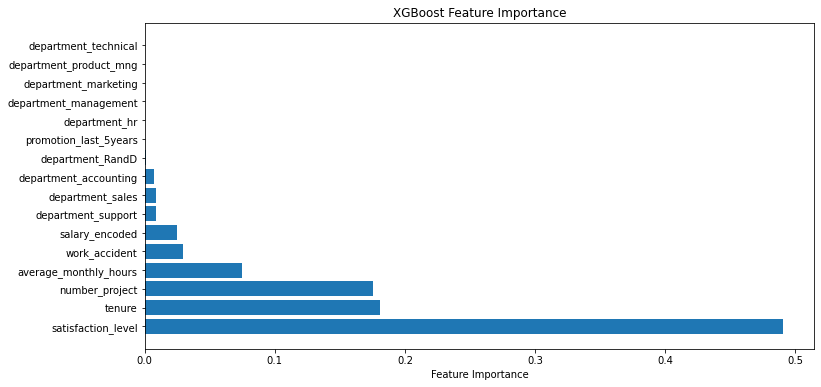

In [ ]:
best_xgb = xgb_opt.best_estimator_
feature_importance = best_xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X0.columns,
    'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)? 
 

> Among the three models built, XGBoost has the best performance in predicting the employees who left. Hence, we should focus on its feature importance graph generated in the previous stage. 
 
- What business recommendations do you propose based on the models built? 
 

> This model works really astonishing. But we still have to monitor its performance from time to time and retrain the model with new data to ensure its consistent accuracy.
 
- What potential recommendations would you make to your manager/company? 
 
> From the feature importances, we would suggest Salifort Motors focusing on the `satisfaction_level`. It dominates among the feature components in the prediction process. This feature should be the first priority for the company to raise. It could be a metric of how well the company operates and the leading team manages in the employees' perspective.

> `tenure`, ' number_project` and `average_monthly_hours` follow in the graph. This will be discussed in next session.  
 
- Do you think your model could be improved? Why or why not? How? 
  
> New data or features may help improve the model, because tree-based models often suffer from overfitting, although XGBoost ones usually mitigate the risk by multiple tree building. 
 
> And we should consider iterate the whole process periodically to ensure the result consistency given by the champion model.  
 
- Given what you know about the data and the models you were using, what other questions could you address for the team? 

> In the feature selection process, we have dropped the `last_evaluation` feature due to its low p-value in the hypothesis testing. We can build the models again to compare the results if we choose to ignore the test. It might generate some other insights.
 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.) 
 
> 1. Metrics: https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall
> 2. XGBoost: https://www.ibm.com/think/topics/xgboost
> 3. Feature Importances: https://developers.google.com/machine-learning/decision-forests/variable-importances
 
- Do you have any ethical considerations in this stage? 
  
> Choosing the metric as standard between `recall` and `f1` would not differentiate our champion selection in this case. But if we redo the project in the future, we have to reconsider revising the standard selection if the retention rate rises, and upsampling or downsampling has to be performed. This would result in different champion. 
 
 
> I have to reiterate that we have dropped the `last_evaluation` in the models we have built. There is room for further studies using distinct approaches in feature engineering. 
 



## Step 5. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [ ]:
champion_table = make_results('XGBoost Final', xgb_y_pred_final, y_val = y_test)
champion_table 

,Model,F1,Recall,Precision,Accuracy
0,XGBoost Final,0.941785,0.914573,0.970667,0.981242


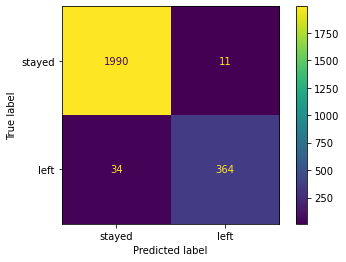

In [ ]:
cm = confusion_matrix(y_test, xgb_y_pred_final)

disp = ConfusionMatrixDisplay(cm, display_labels = ['stayed','left'])
disp.plot(values_format = '');


In [ ]:
xgb_y_pred_final = xgb_opt.predict(X_test)

> As the other forms of tree-based models, XGBoost models predict by building trees with weighting the features differently. However, the twist is that, unlike most of the tree-based models building trees parallelly, XGBoost build sequentially by taking the errors the previous tree makes into account and tree the next. The idea is that it corrects by focusing more on the errors and 'learns from mistakes'. 
 
> Apart from the high metrics in the result table, one of XGBoost's pros is that it does not require as many assumptions on data distribution and features relationships as it does for regression models. This makes it much easier in monitoring the model's performance in the long-run.

> The overall ultimate scores drop a little bit but still show the excellency. Although a drop sounds disappointing, it actually implies that the model's overfitting problem is not too worrying.
  
> Since our ultimate goal is to identify ways to improve the retention rate, we should focus on the bottom-right pane of the confusion matrix. This section represents employees who are predicted to leave and actually did leave. Compared to the sum of the bottom panes, which is 34+364 = 398, the XGBoost model labels 364 of them. This is an alternative to demonstrate the `recall` score, ie., in numbers. 
  
> Unfortunately, it is not easy to interpret `f1` score using confusion matrix, as `f1` score is calculated as:
> $\frac{precision  \times  recall}{precision  +  recall}\times 2 $.

### Summary of model results

> The XGB is our champion, which has the final `f1` score of 94.18%

### Conclusion, Recommendations, Next Steps

> 1. Present the model and the feature importances to the leadership team and Human Resources team. 
> 2. Recommendation 1: Focus on the `satisfaction_level` as a benchmark of the company management.
> 3. Recommendation 2: Human Resources team could base on the result to allocate the effort put on existing employees or future hiring strategy. 
> 4. Recommendation 3: feasible company actions such as employees loyalty bonuses based on `tenure`, reallocation of `number_project` and `average_monthly_hours` among employees, etc.
> 5. review the model periodically after implementation of the employees retention policies. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.